In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [3]:
from src.data_loader import ViTDataLoader
from src.vit_train import load_model_dir, ViTTrainer
from src.vit_data import load_cd_data_24x128

model_dir = 'output/cd_24x128_more_complex_20220704_1412'

vit, config = load_model_dir(model_dir, legacy=False)
vit_data = load_cd_data_24x128()
config_name = "even_more_complex"

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG, 
                           valid_type=config.VALIDATION_TYPE, valid_arg=config.VALIDATION_ARG)
print(dataloader.split_repr())

trainer = ViTTrainer(vit, config_name, dataloader, resume=True, resume_path=model_dir)


Split: time,120; Training: 22135; Validation: 0; Testing: 4427


In [4]:
trainer.setup()

Resuming from 2960...


In [7]:
trainer.compute_predictions_losses()

Computing test predictions...Done. 0.32030932802071177, 0.6537923432633863
Computing train predictions...Done. 0.038285659127336974, 0.9622617814753958
Computing validation predictions...Done. nan, nan


In [8]:
print(trainer.perf_str)

Loss:
  Train:	0.038
  Valid:	nan
  Test: 	0.320

R2:
  Train:	0.962
  Valid:	nan
  Test: 	0.654


0

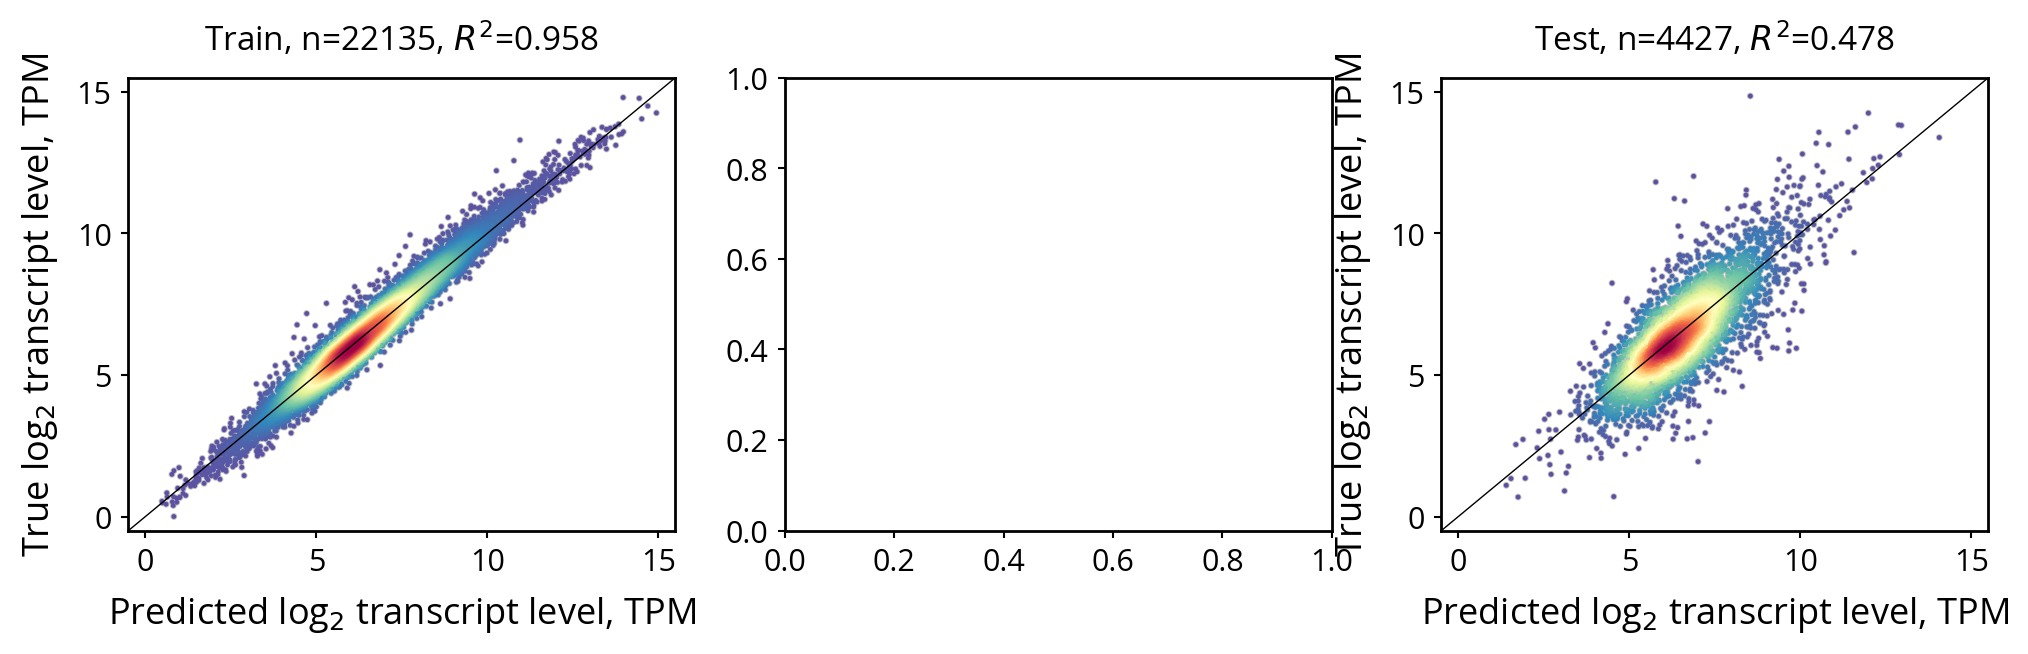

In [376]:
trainer.plot_predictions()
0

0.6537923432633863

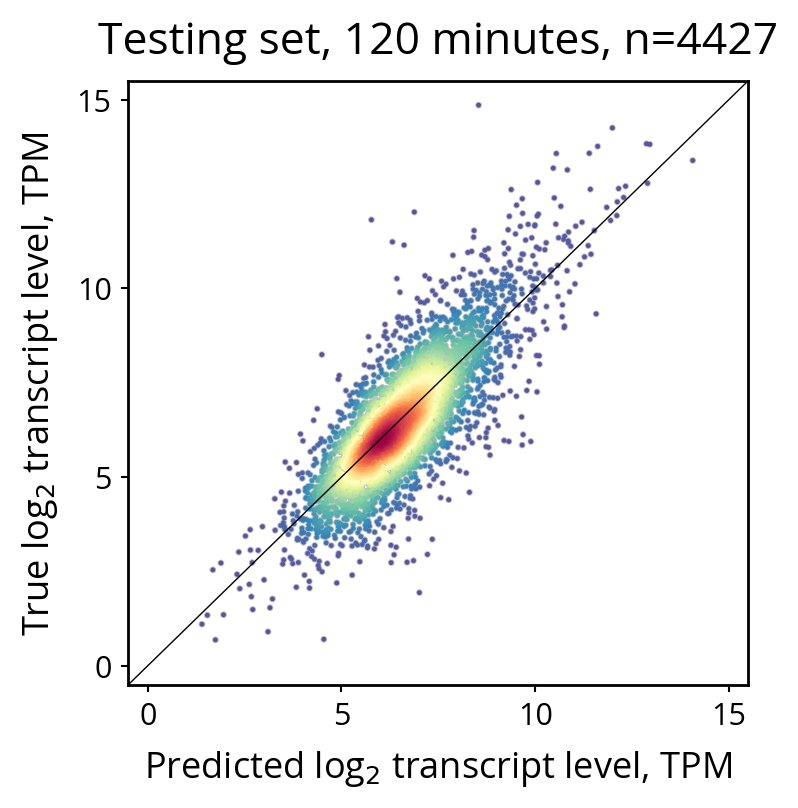

In [379]:
from src.vit_viz import plot_scatter_predicted_true
from sklearn.metrics import r2_score

plt.figure(figsize=(4, 4))

y = vit_data.unscale_log_tx(trainer.test_tx)
x = vit_data.unscale_log_tx(trainer.test_predictions)

test_r2 = plot_scatter_predicted_true(x, y, "Testing set, 120 minutes")
r2_score(trainer.test_tx, trainer.test_predictions)


In [13]:
tpm_df = vit_data.read_log_tpm_data()

In [14]:
tpm_df.head(2)

time,0.0,7.5,15.0,30.0,60.0,120.0
orf_name,,,,,,
YAL001C,5.018297,4.690297,5.358192,5.635665,5.786156,5.906502
YAL002W,4.920433,4.960072,5.729812,6.254715,6.613016,6.581889


In [15]:
orf_names = trainer.dataloader.testloader.dataset[:][2]
data = pd.DataFrame(index=orf_names, data={'true': y, 'predicted': x})
data['diff'] = np.abs(data.true - data.predicted)

data = data.join(tpm_df)
data['diff_60'] = np.abs(data[60.0] - data['true'])


In [16]:

data[(data['diff'] < 2) & (data['true'] > 10)].sort_values('diff_60', ascending=False).head(2)

,true,predicted,diff,0.0,7.5,15.0,30.0,60.0,120.0,diff_60
YPL240C,11.655697,9.987021,1.668676,4.523235,10.030162,11.955815,9.839172,10.025850,11.655697,1.629847
YBR101C,10.060407,8.761426,1.298981,7.667255,9.962837,10.925976,7.803036,8.693286,10.060407,1.367121


In [17]:
from src.rna_plotter import load_rna_plotter
from src.orf_plotter import ORFAnnotationPlotter

orf_plotter = ORFAnnotationPlotter()
rna_plotter = load_rna_plotter()
trainer.orf_plotter = orf_plotter
trainer.rna_plotter = rna_plotter


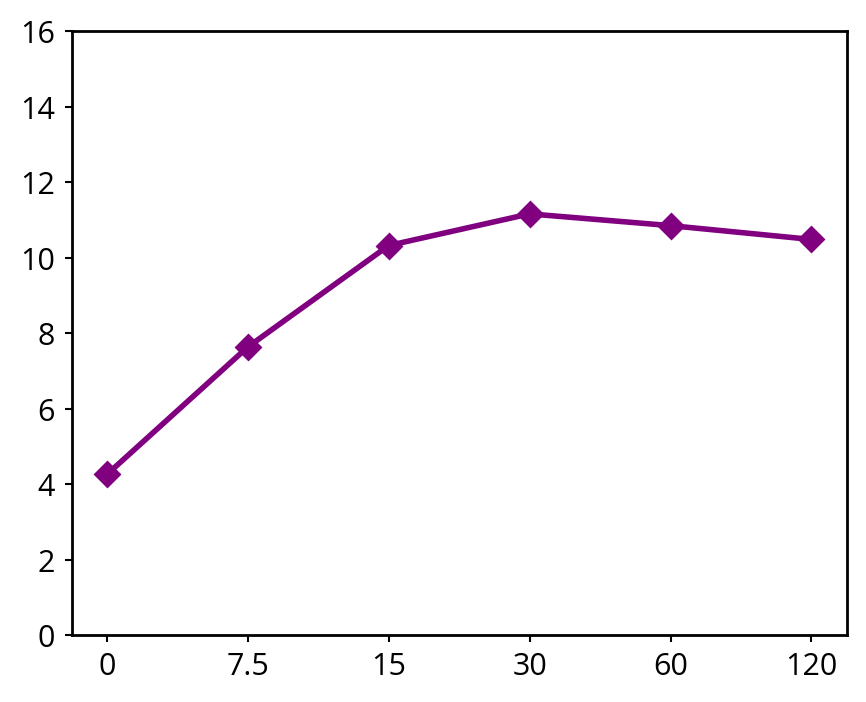

In [381]:
from src.vit_viz import plot_gene_tpm

plot_gene_tpm('MET16', vit_data)


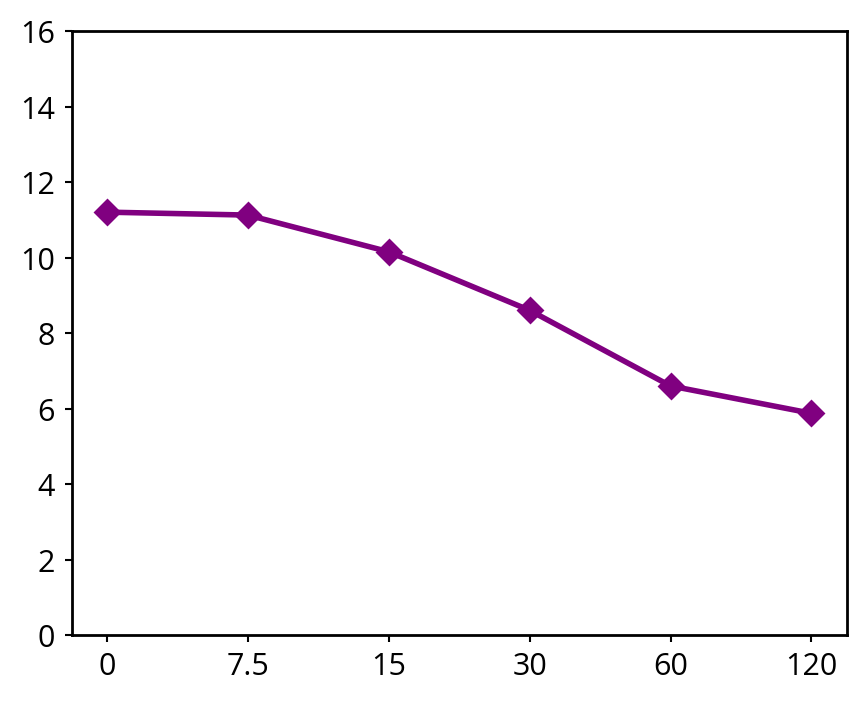

In [380]:
from src.vit_viz import plot_gene_tpm

plot_gene_tpm('RPS7A', vit_data)


In [19]:
vit_data.orfs_data[vit_data.orfs_data['name'] == 'MET16']

,name,chr,start,stop,length,strand,orf_class,ontology,TSS,PAS,half_life,coverage
orf_name,,,,,,,,,,,,
YPR167C,MET16,16,876847,877632,786,-,Verified,"GO:0000103,GO:0004604,GO:0005622,GO:0005737,GO...",877716,876792.0,23.493333,0.9825


0

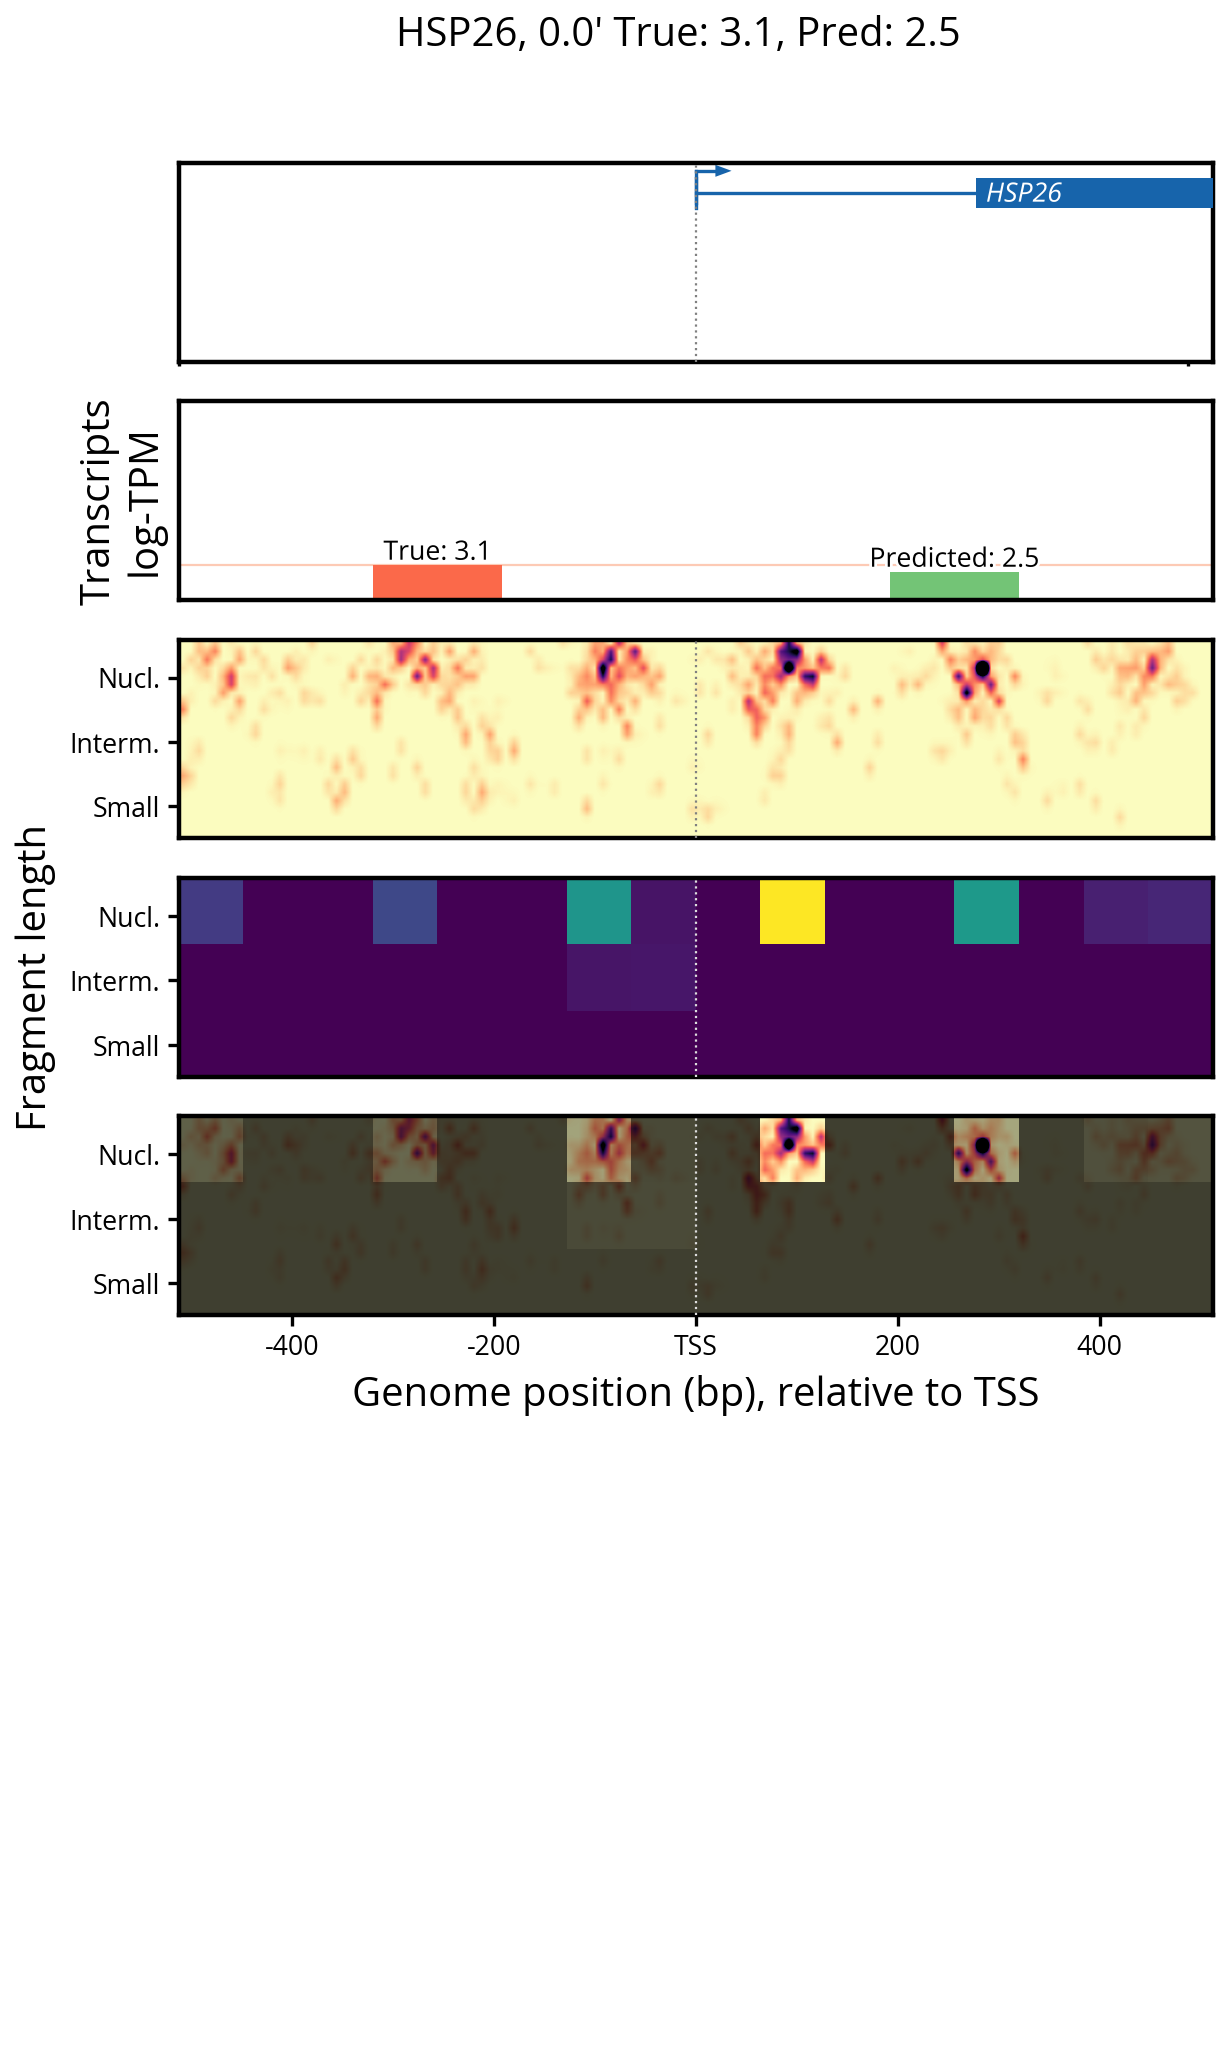

In [383]:
from src.vit_viz import plot_gene_prediction

trainer.plot_gene('HSP26', 0.0)
0

In [384]:
from src.vit_viz import plot_gene_prediction

trainer.plot_gene('MET13', 120.0)
0

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/trung/opt/anaconda3/envs/chromatin-transformers/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/09/f2kb1zq9485dc8jvk0sbkbcr0000gn/T/ipykernel_5505/1665547529.py", line 3, in <cell line: 3>
    trainer.plot_gene('MET13', 120.0)
  File "/Users/trung/Research/chromatin-transformers/src/vit_train.py", line 430, in plot_gene
    plot_gene_prediction(gene_name, time, self.vit, self.dataloader.dataset,
  File "/Users/trung/Research/chromatin-transformers/src/vit_viz.py", line 48, in plot_gene_prediction
    idx = vit_data.index_for(gene_name, time=time)
  File "/Users/trung/Research/chromatin-transformers/src/vit_data.py", line 66, in index_for
    orf_name = self.orfs_data[(self.orfs_data['name'] == gene_name) |
IndexError: index 0 is out of bounds for axis 0 with size 0

During handling of the above exception, another exception oc

0

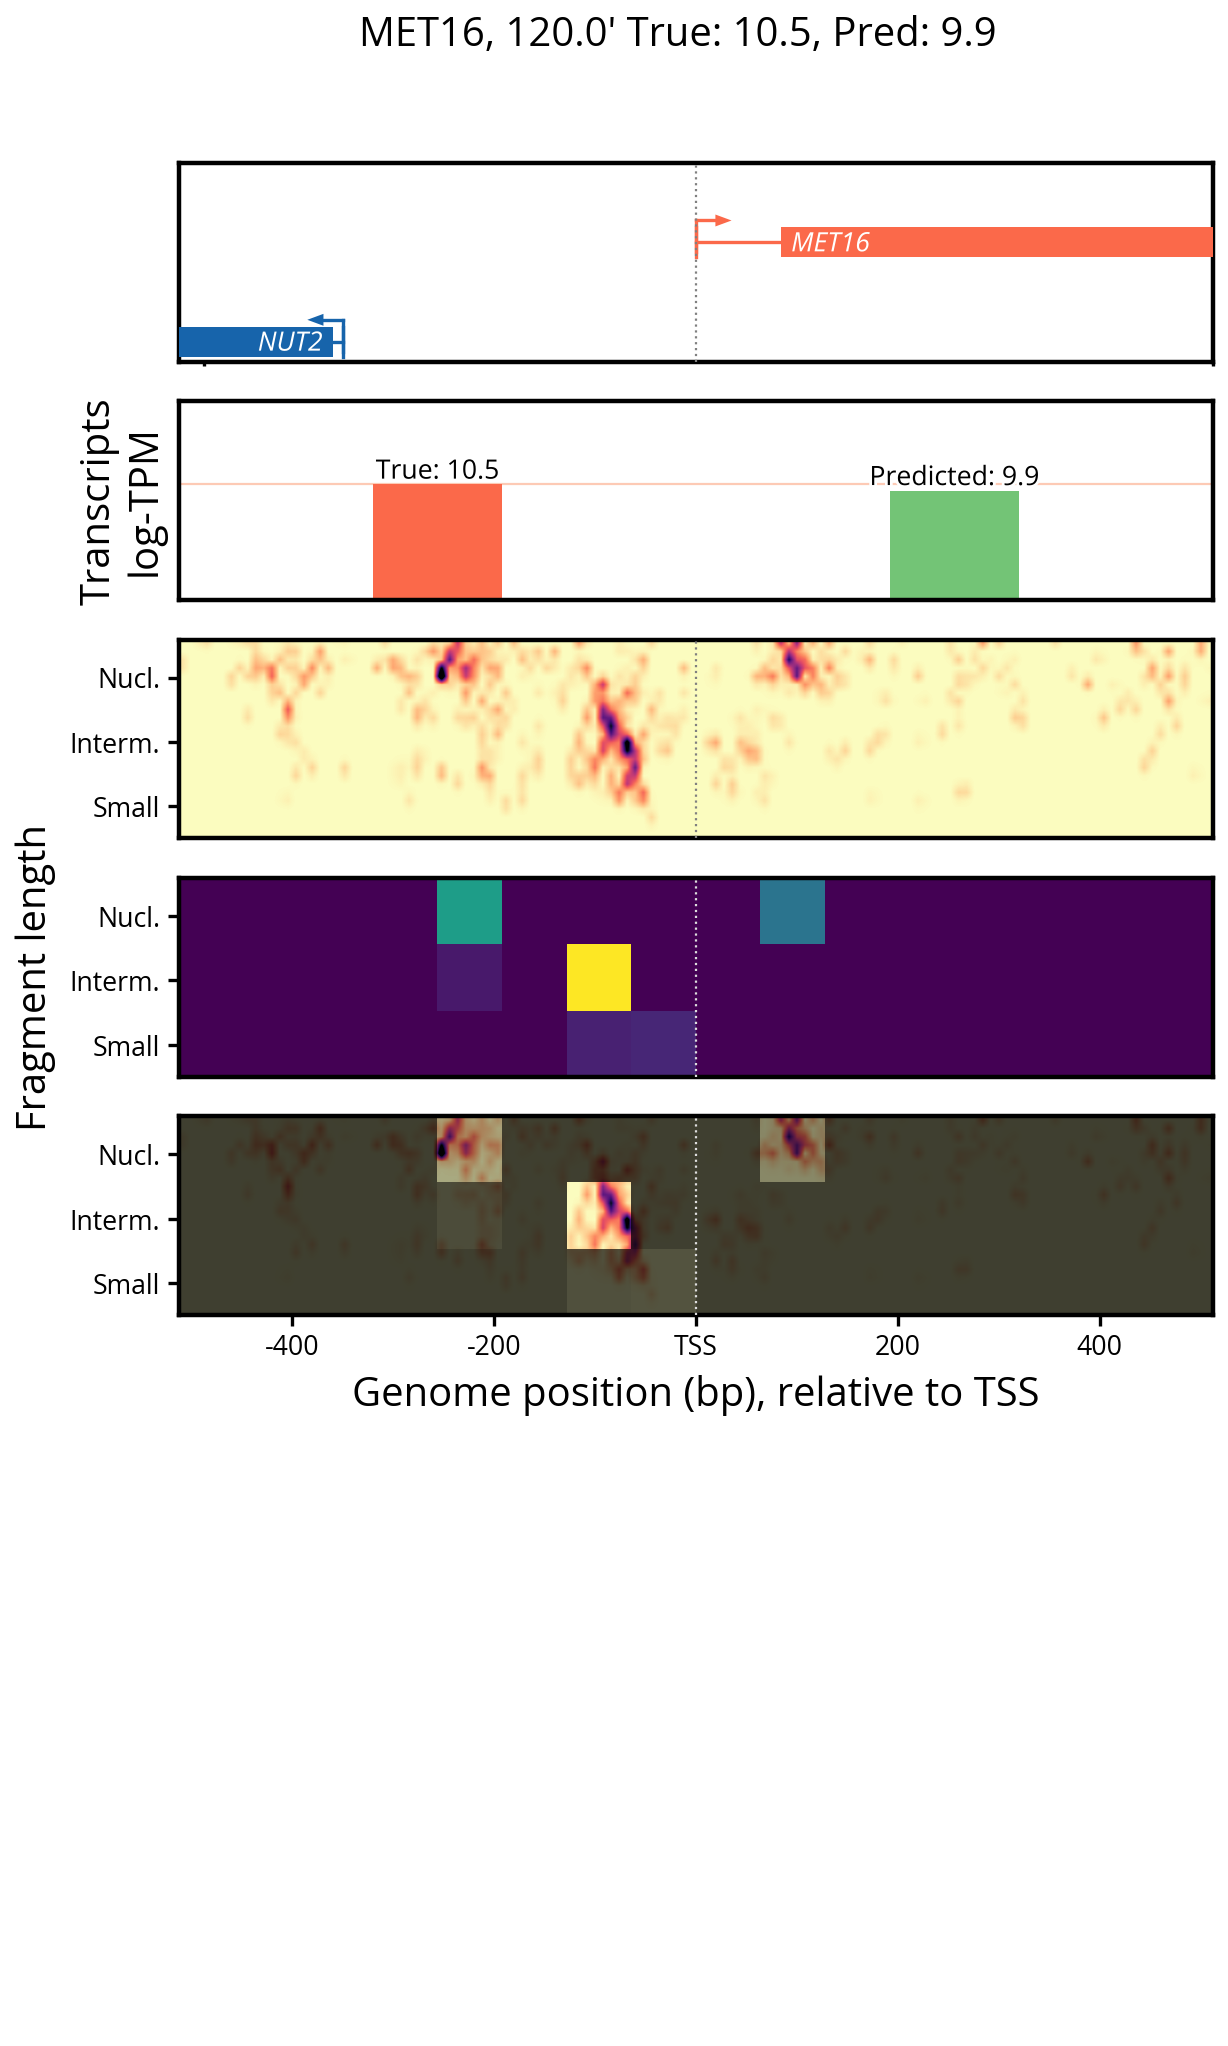

In [26]:
from src.vit_viz import plot_gene_prediction

trainer.plot_gene('MET16', 120.0)
0

0

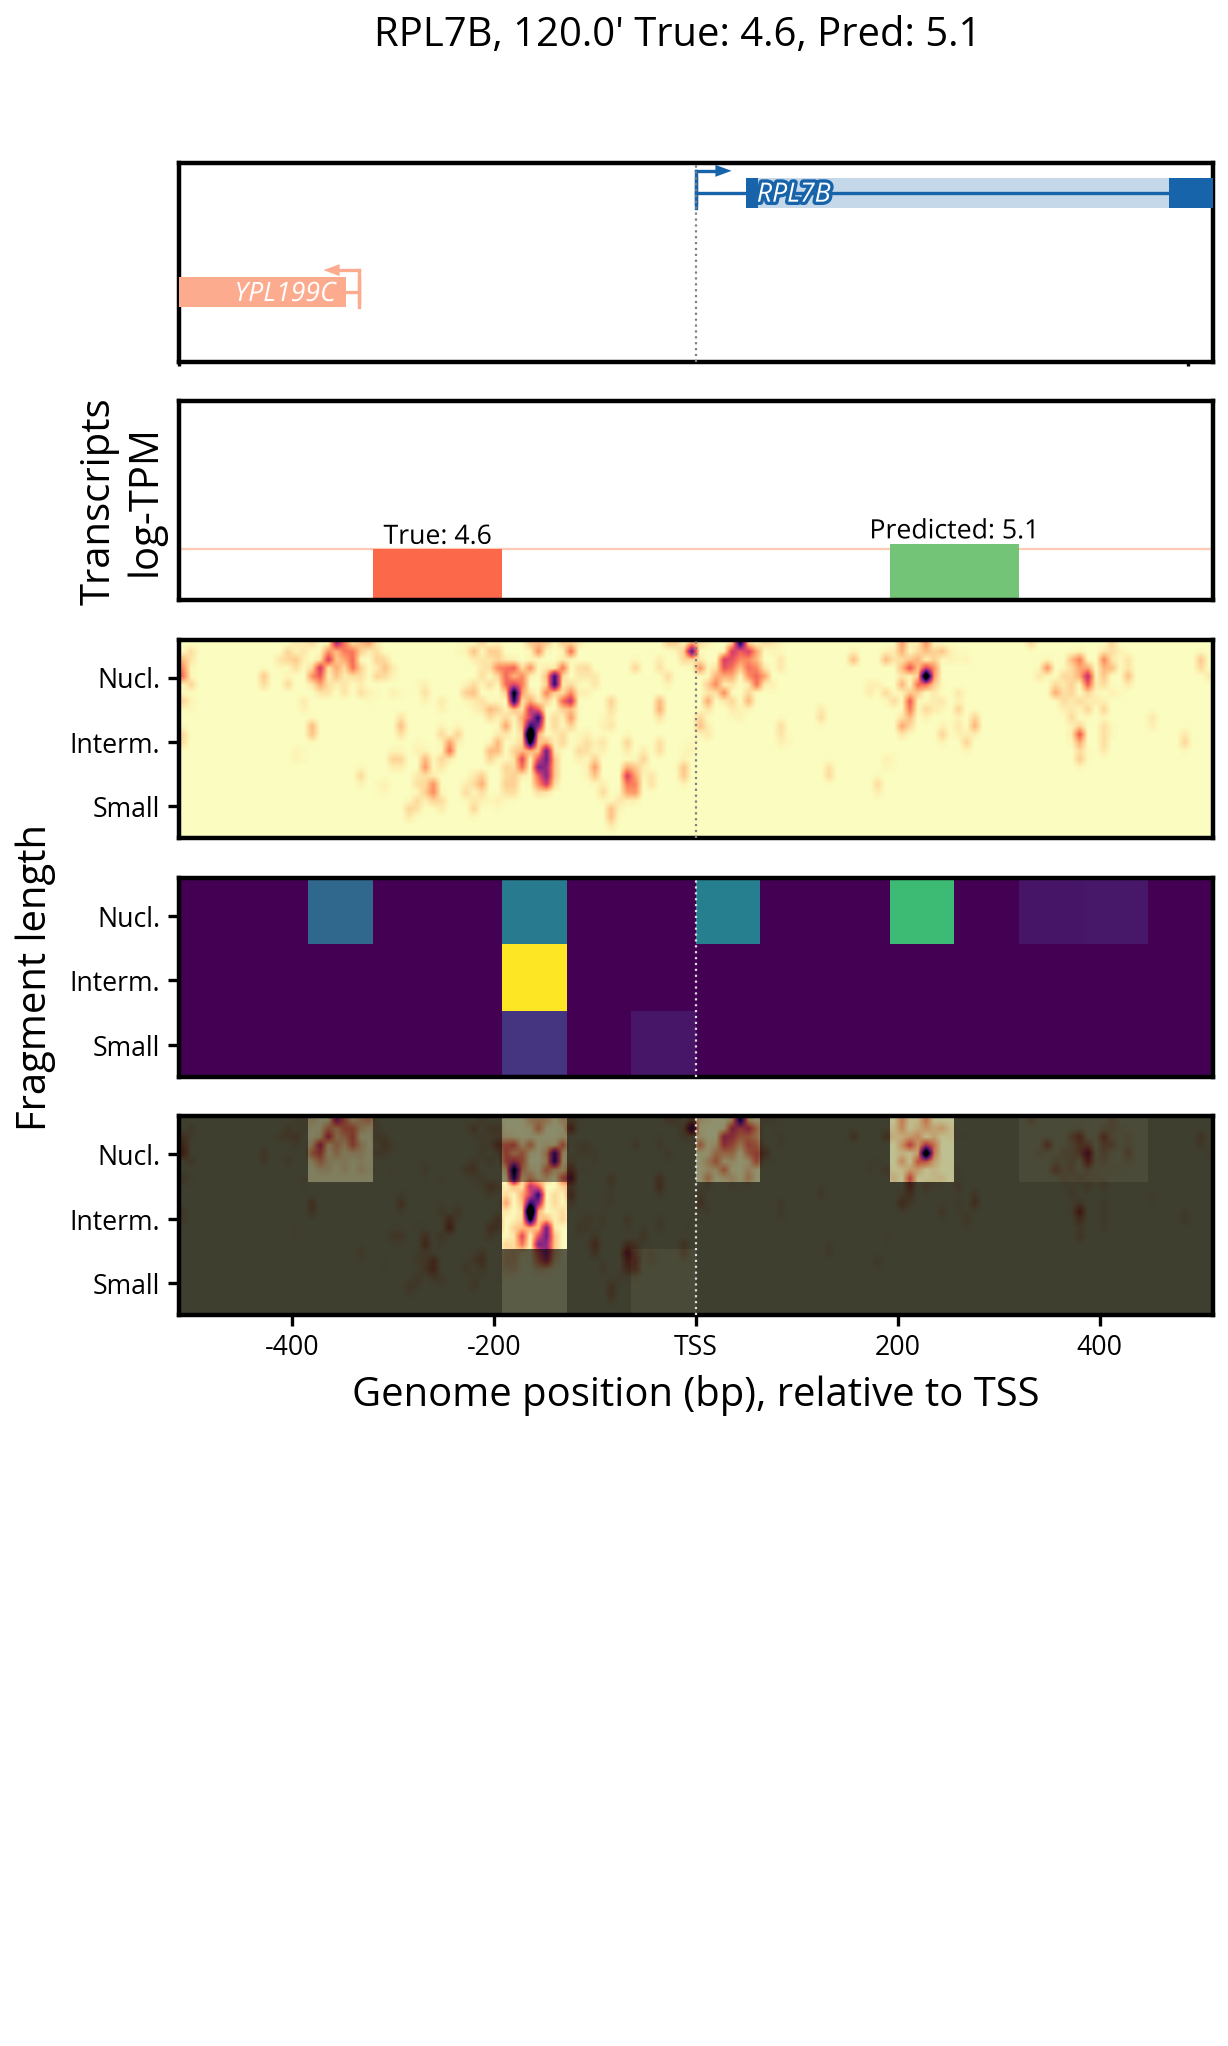

In [387]:
from src.vit_viz import plot_gene_prediction

trainer.plot_gene('RPL7B', 120.0)
0

0

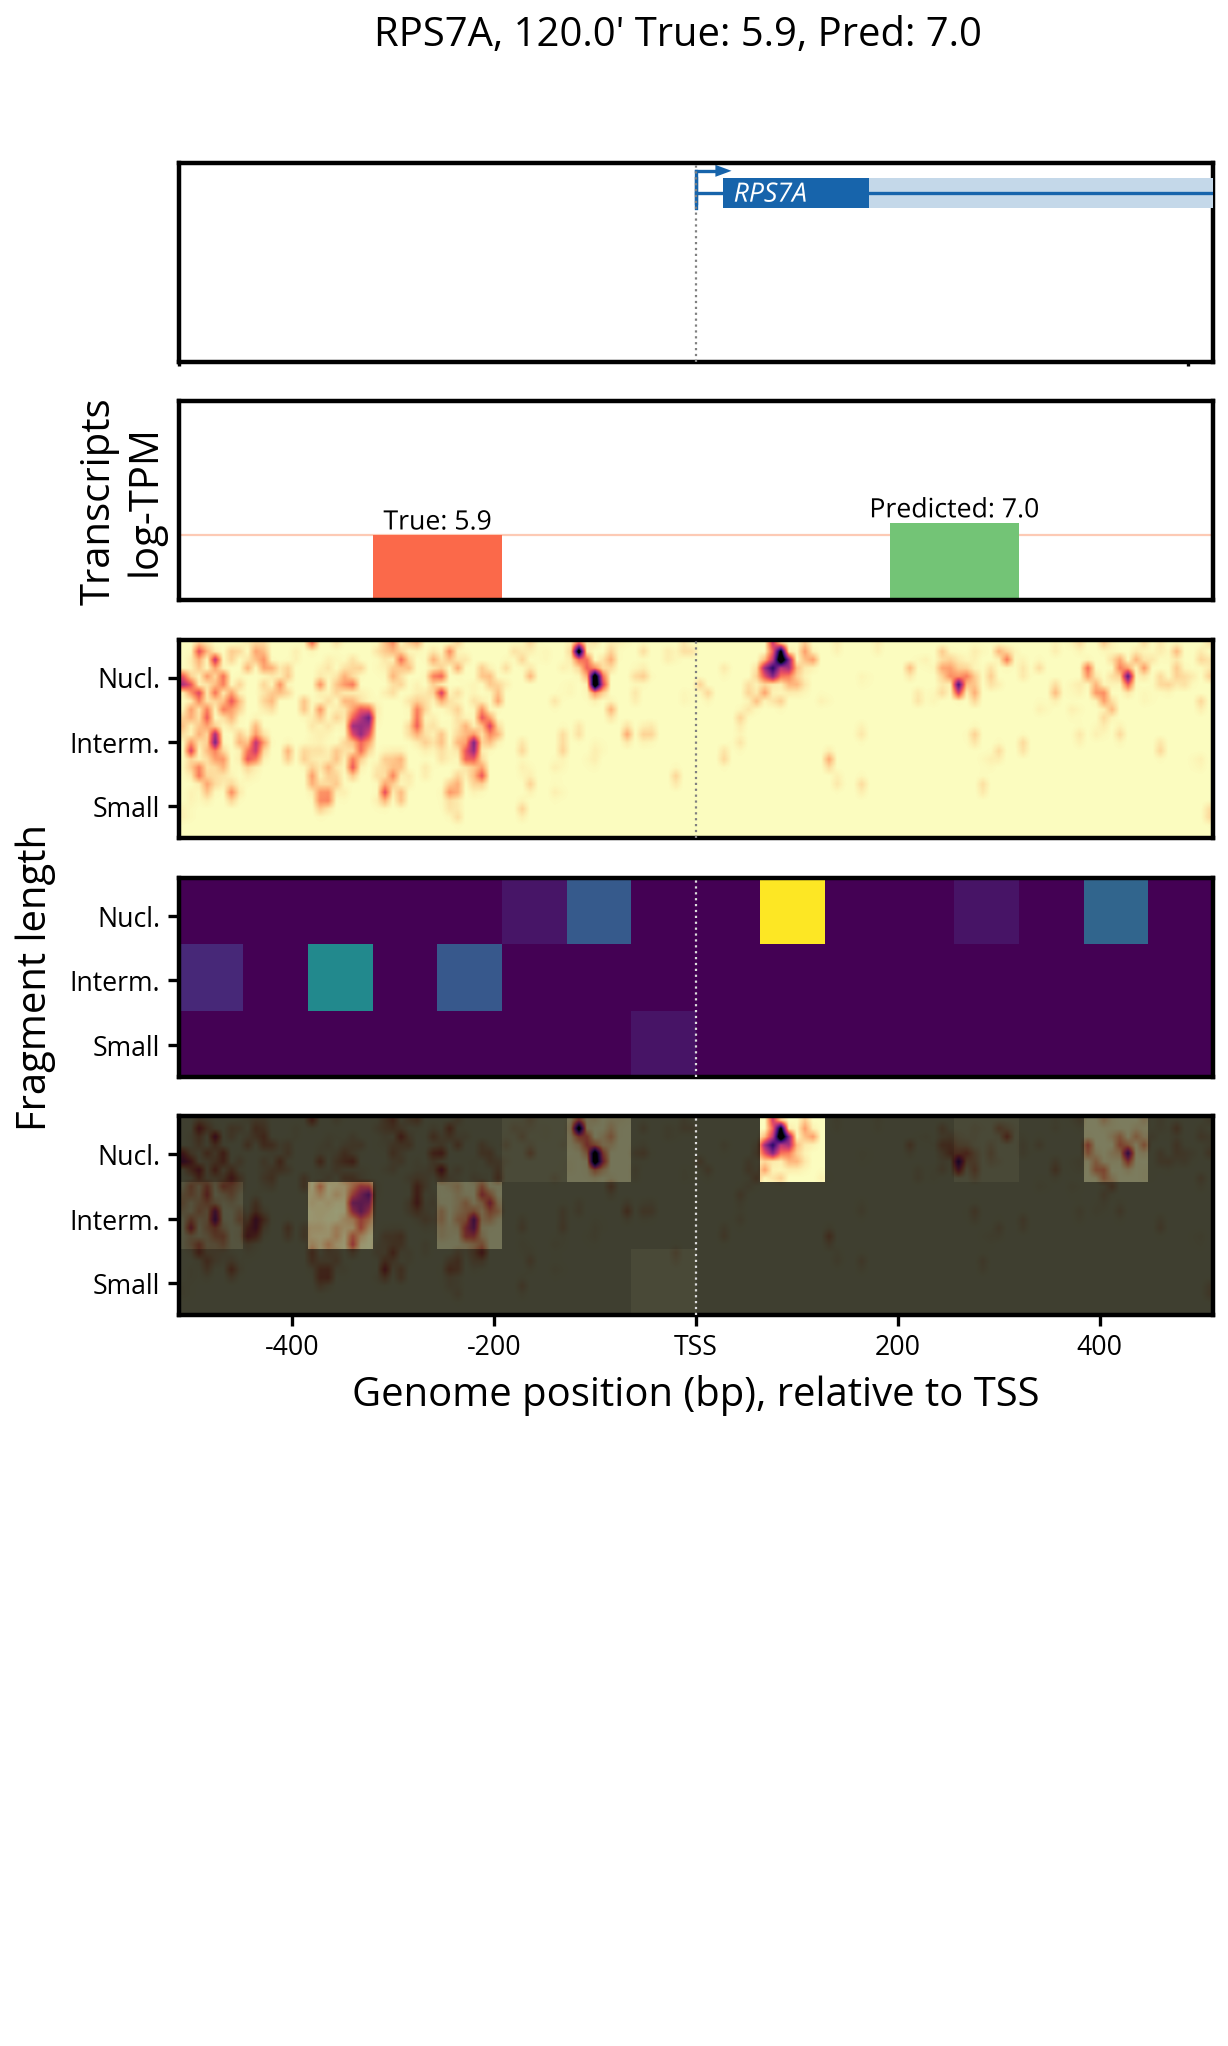

In [21]:
from src.vit_viz import plot_gene_prediction

trainer.plot_gene('RPS7A', 120.0)
0

In [31]:
trainer.compute_attentions()

1/4427 - 00:00:00.09
1001/4427 - 00:01:05.62
2001/4427 - 00:02:14.86
3001/4427 - 00:03:42.73
4001/4427 - 00:05:20.37


array([[[6.58683777e-02, 9.91987959e-02, 5.69901720e-04, ...,
         1.83843467e-02, 3.02397227e-03, 2.63734683e-02],
        [6.08449196e-03, 1.20896231e-02, 5.90303587e-03, ...,
         2.03870586e-03, 0.00000000e+00, 5.92299446e-04],
        [1.28022279e-03, 3.21789016e-03, 9.59309749e-03, ...,
         3.20299268e-02, 6.75595365e-03, 0.00000000e+00]],

       [[9.14613903e-03, 6.27144764e-04, 0.00000000e+00, ...,
         1.91993284e-04, 2.16251295e-02, 1.43540762e-02],
        [1.05180290e-04, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.73386464e-02, 9.05342968e-05],
        [1.56330809e-01, 1.52590200e-02, 9.93783213e-03, ...,
         7.35285163e-01, 5.00203017e-03, 0.00000000e+00]],

       [[0.00000000e+00, 1.30166230e-03, 5.97407197e-05, ...,
         1.10011548e-03, 1.03308875e-02, 7.79212415e-02],
        [1.15450595e-04, 3.11673395e-02, 2.56836545e-02, ...,
         4.35002567e-03, 5.74926324e-02, 1.62908854e-03],
        [7.16066241e-01, 3.76565894e

In [32]:
from einops.layers.torch import Rearrange
import torch

vectorize_att = Rearrange('b (r) (c) -> b (r c)')
atts_vectorized = vectorize_att(torch.Tensor(trainer.collected_attentions)).numpy()
atts_vectorized.shape

(4427, 48)

In [35]:
idx_120 = np.arange(len(vit_data))[vit_data.times == 120]

atts_120 = trainer.collected_attentions#[idx_120]
atts_vec_120 = atts_vectorized#[idx_120]
orfs_120 = trainer.dataloader.dataset.orfs[idx_120]

In [306]:
def plot_tpm_cluster_idx(trainer, orfs_120, current_idx):
    
    q0, q1, q2, q3 = 0.0, 0.25, 0.75, 1.
    quantiles = trainer.dataloader.dataset.read_log_tpm_data().loc[orfs_120[current_idx]].quantile(
        [q0, q1, 0.5, q2, q3])

    meds = quantiles.loc[0.5]
    q0s = quantiles.loc[q0]
    q1s = quantiles.loc[q1]
    q2s = quantiles.loc[q2]
    q3s = quantiles.loc[q3]
    
    x = range(len(quantiles.columns))
    
    plt.plot(x, meds.values, '-', c='purple')
    plt.plot(x, meds.values, 'D', c='black', zorder=5)
    
    cspan = 8, 16
    
    val = q3s[120]
    
    plt.fill_between(x, q1s, q2s, color=plt.get_cmap('Purples')
                     ((val-cspan[0])/(cspan[1]-cspan[0])), 
                     alpha=1., zorder=2)
    
    plt.fill_between(x, q0s, q3s, color=plt.get_cmap('Purples')
                     ((val-cspan[0])/(cspan[1]-cspan[0])), 
                     alpha=0.5, zorder=2)

    ax = plt.gca()
    plt.xticks(x, quantiles.columns)
    plt.yticks(np.arange(0, 20, 8))
    ax.set_yticks(np.arange(0, 20, 4), minor=True)
    plt.ylim(-1, 16)
    plt.xlim(0, 5)

    #for y in np.arange(0, 20, 4):
    #    plt.axhline(y, c='#dddddd', lw=1, zorder=1)
    plt.ylabel("$\log$ TPM")

In [389]:
from sklearn.cluster import KMeans

c = 32

np.random.seed(123)
kmeans = KMeans(n_clusters=c, random_state=1).fit(atts_vec_120)
cd_120_cluster_labels = kmeans.labels_
imgs_120 = vit_data.all_imgs[idx_120]


In [390]:
cl_df = pd.DataFrame(index=np.arange(c))

for clus, row in cl_df.iterrows():
    
    current_idx = np.arange(len(atts_120))[cd_120_cluster_labels == clus]
    
    q0, q1, q2, q3 = 0, 0.25, 0.75, 1
    quantiles = trainer.dataloader.dataset.read_log_tpm_data().loc[orfs_120[current_idx]].quantile(
        [q0, q1, 0.5, q2, q3])

    cl_df.loc[clus, 'q0_120'] = quantiles[120.0][q0]
    cl_df.loc[clus, 'q25_120'] = quantiles[120.0][q2]
    cl_df.loc[clus, 'med_120'] = quantiles[120.0][0.5]
    cl_df.loc[clus, 'q75_120'] = quantiles[120.0][q2]
    cl_df.loc[clus, 'q100_120'] = quantiles[120.0][q3]

cl_df = cl_df.sort_values('q100_120')

In [391]:
cl_df.head(2)

,q0_120,q25_120,med_120,q75_120,q100_120
5,2.785844,6.899543,6.146499,6.899543,9.209611
8,1.831212,7.000604,6.041621,7.000604,9.249980


In [392]:
cl_df.tail(2)

,q0_120,q25_120,med_120,q75_120,q100_120
22,0.902886,9.005649,7.515242,9.005649,14.249459
13,2.742108,9.225191,7.385386,9.225191,14.851188


Directory exists. Skipping.


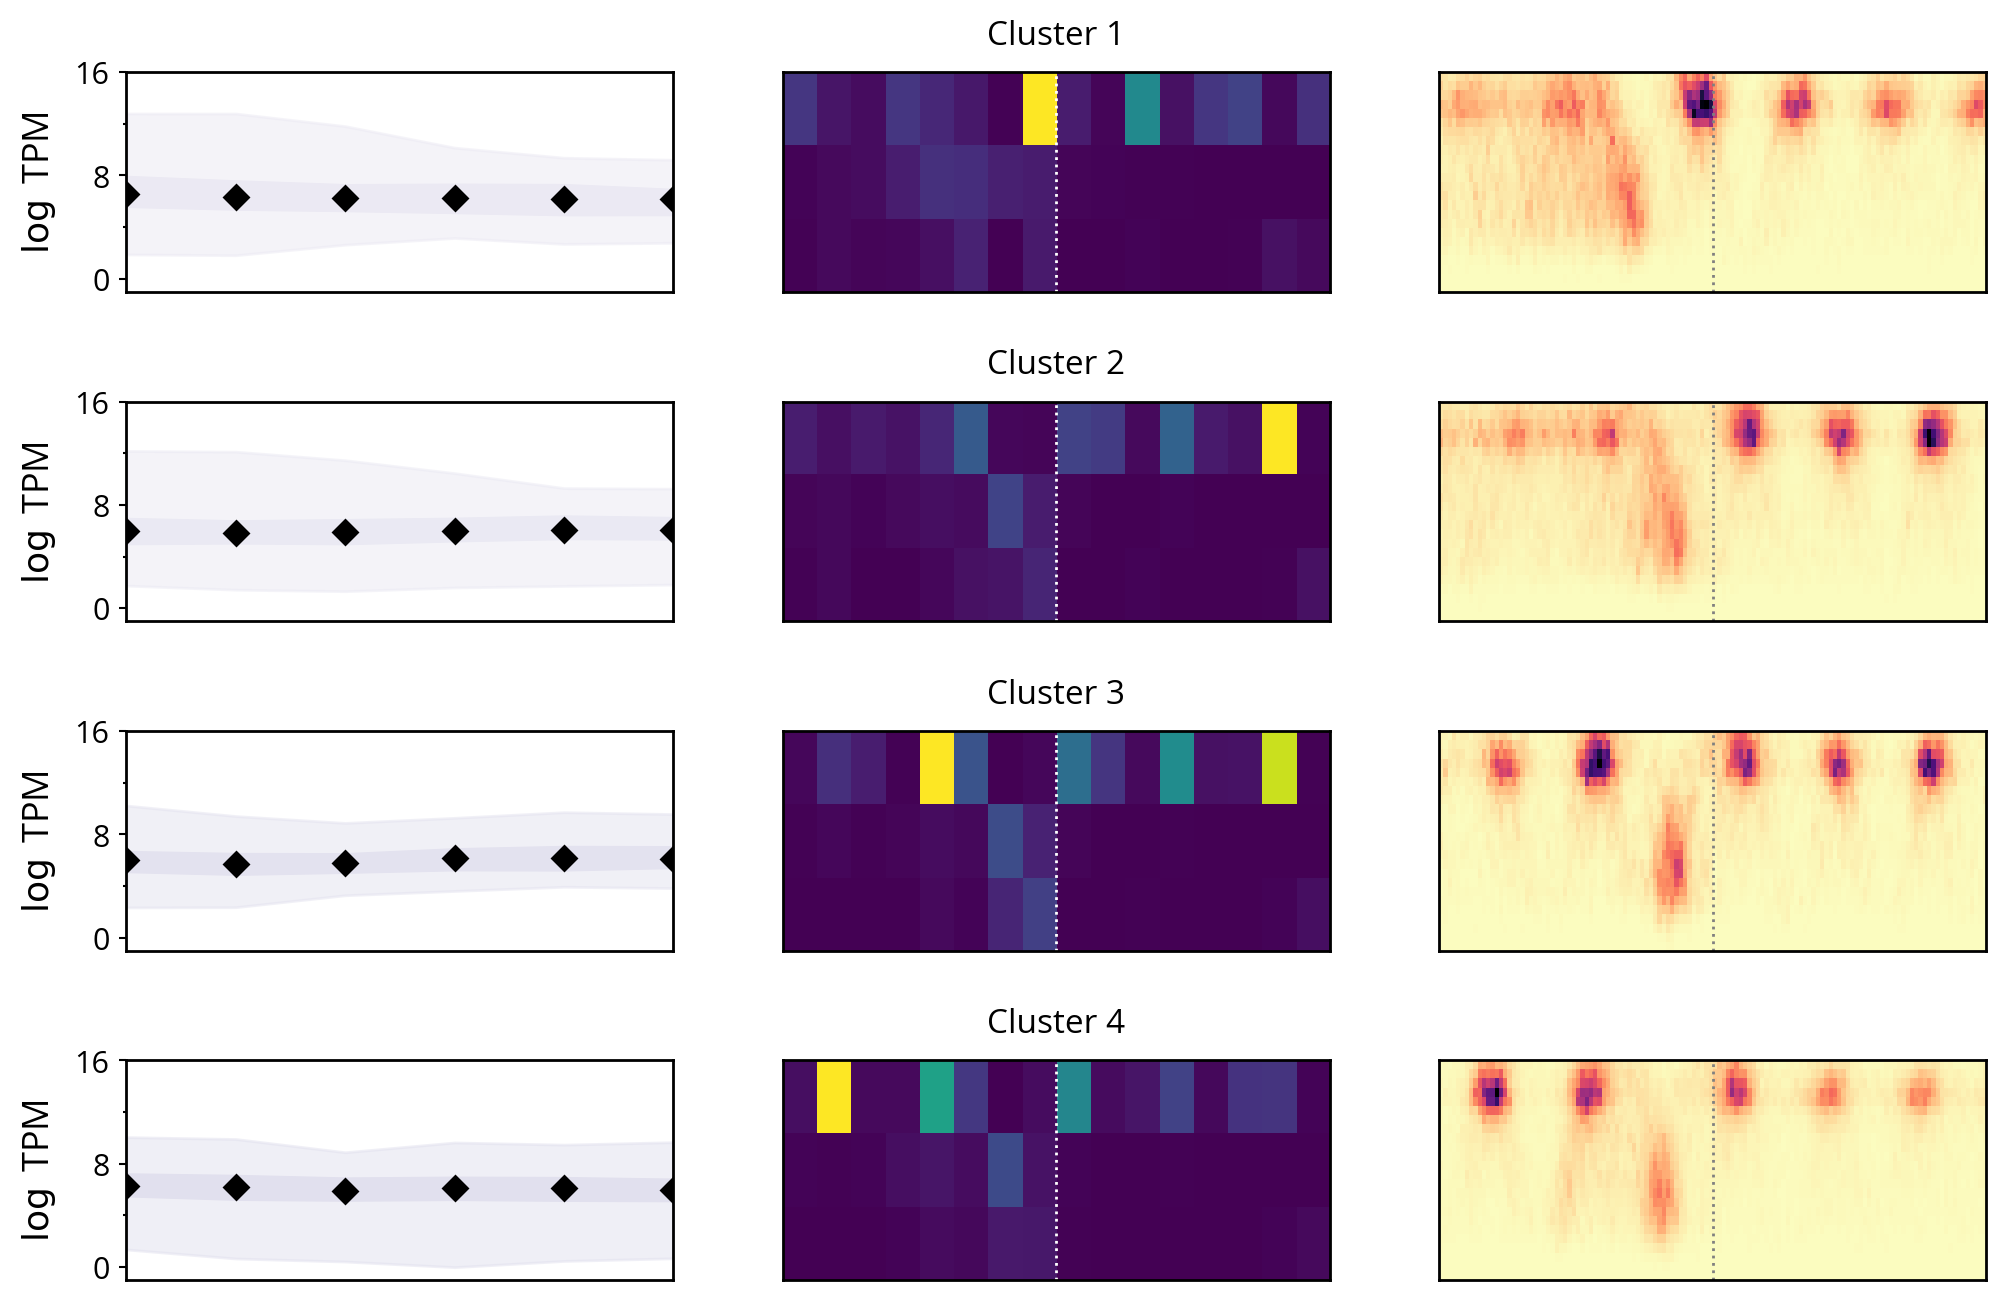

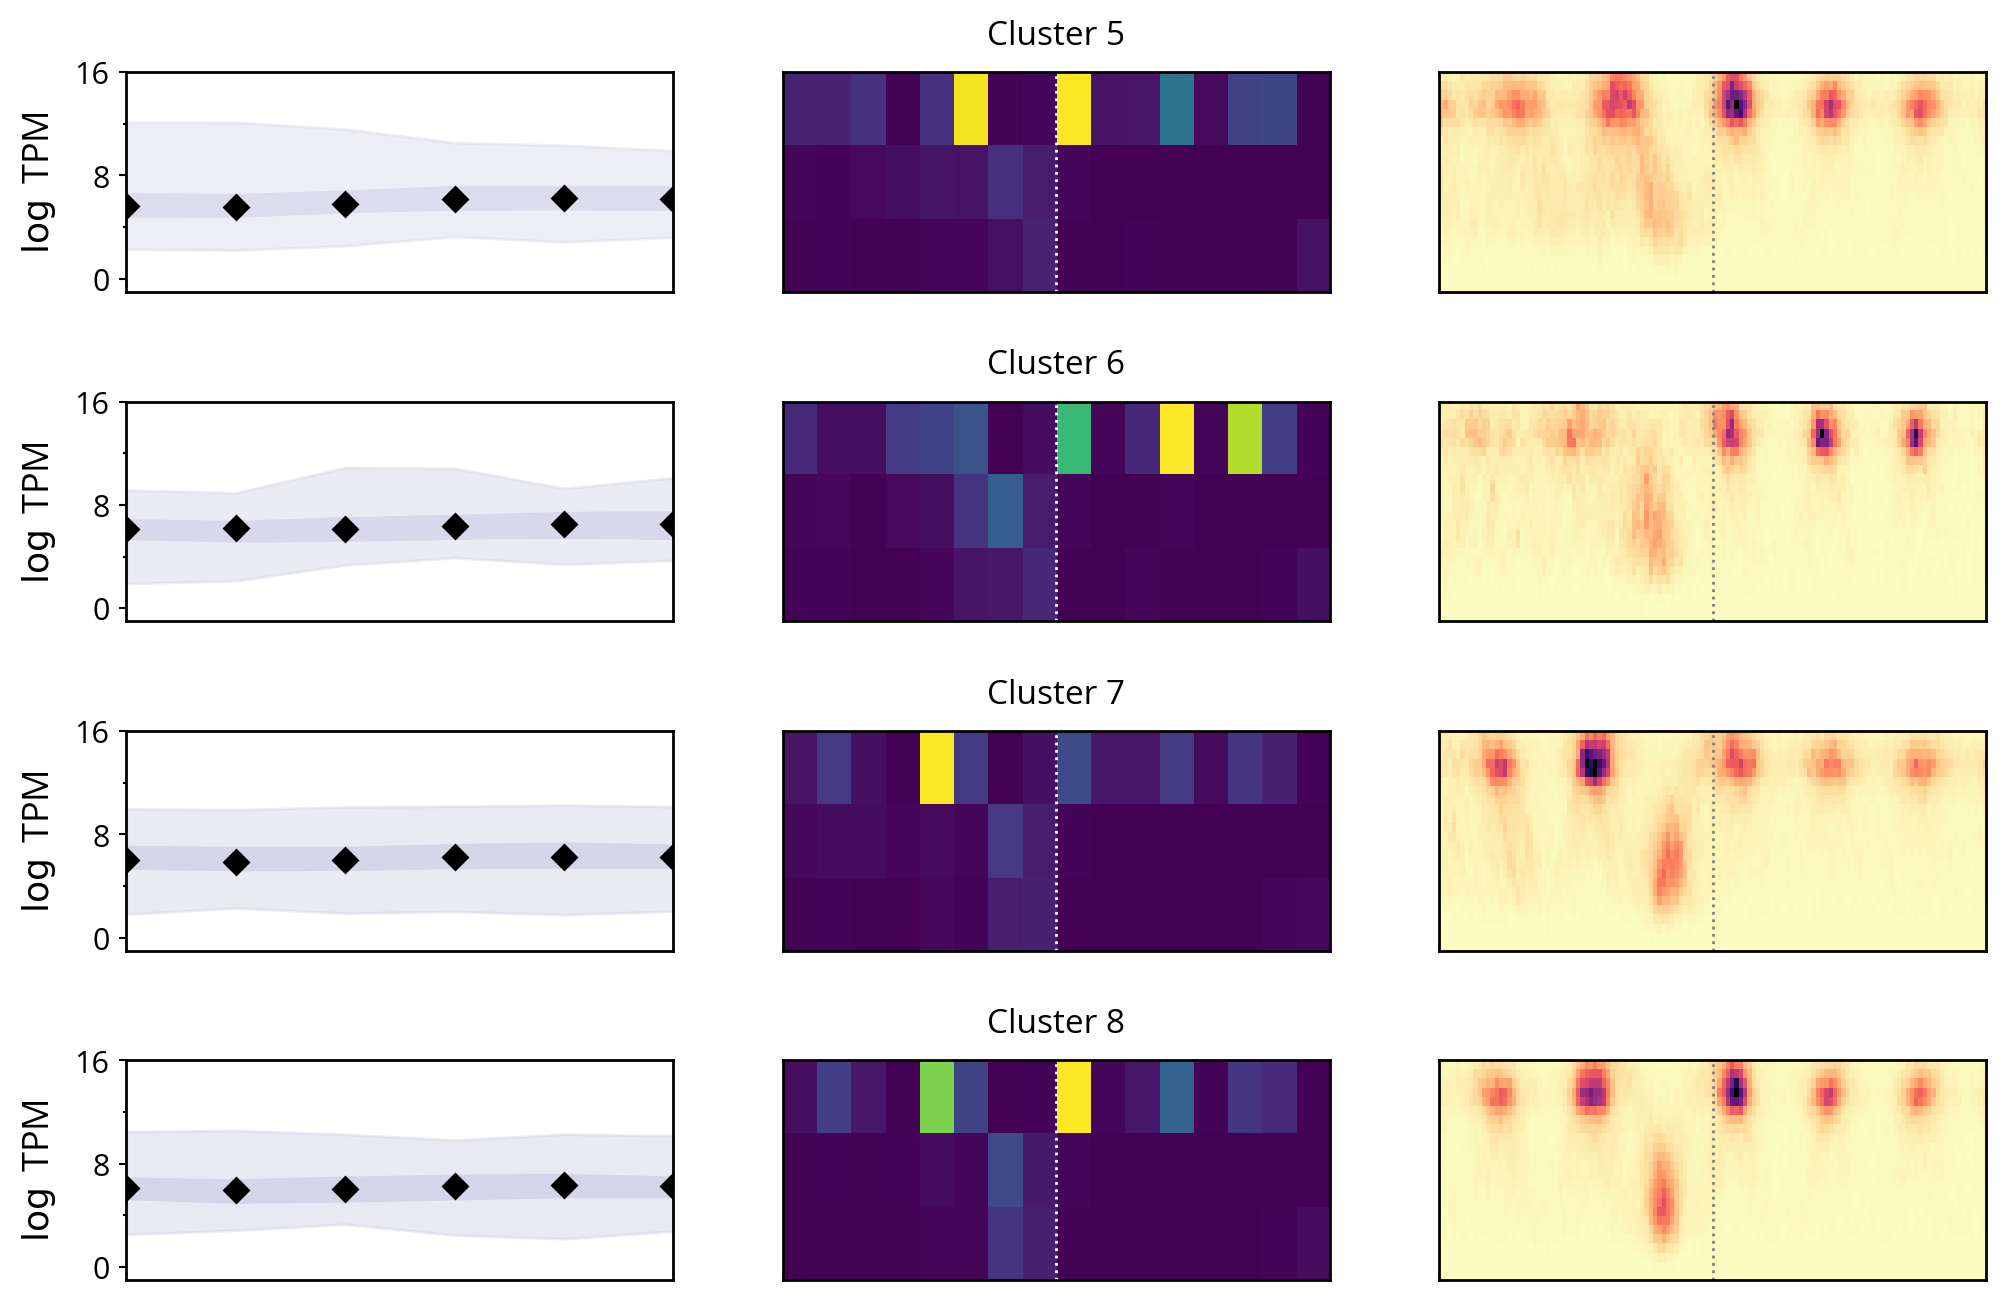

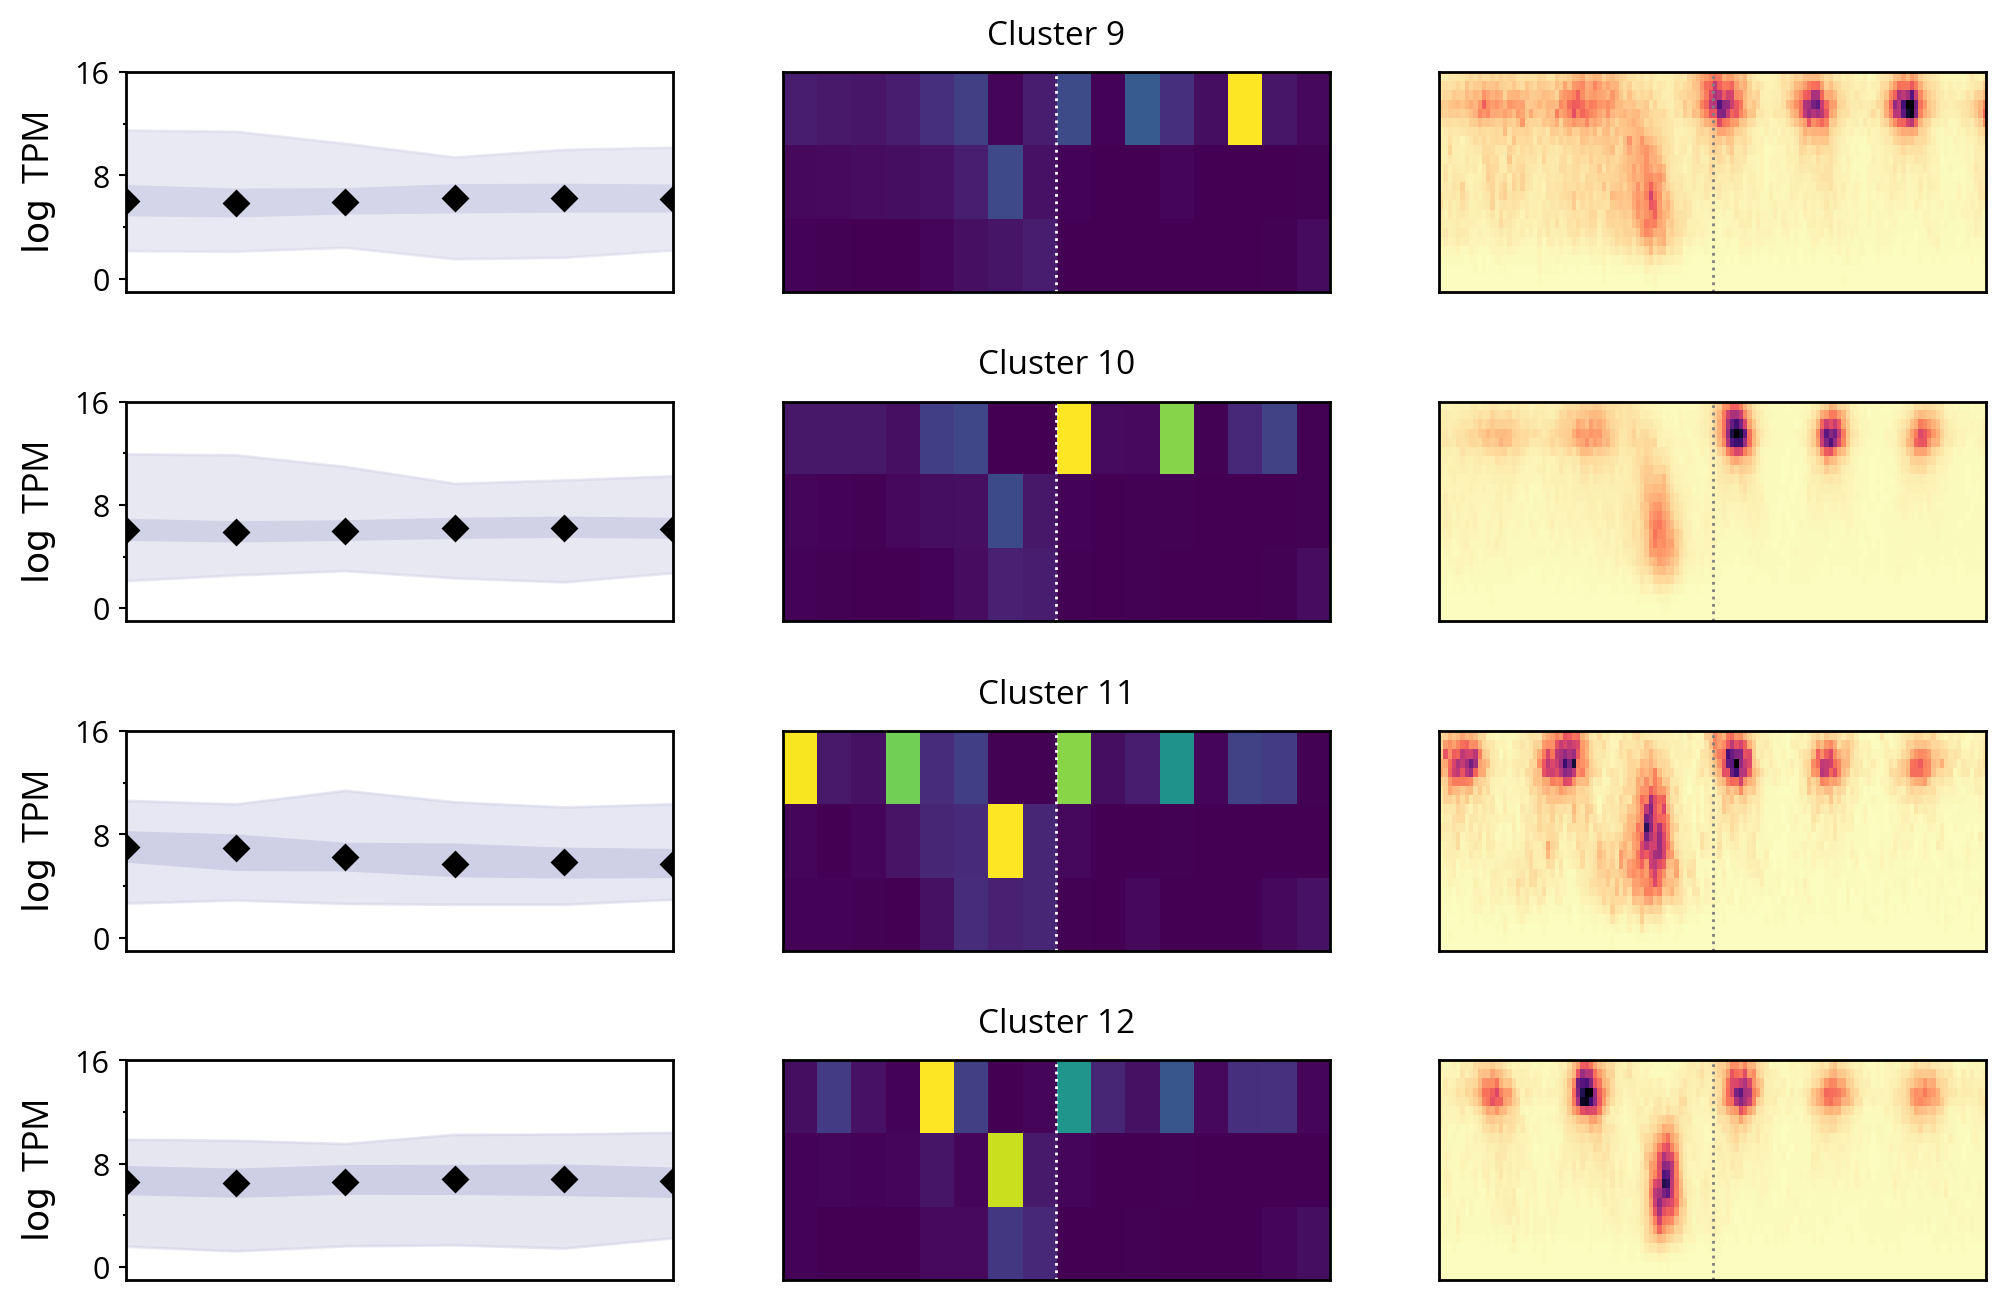

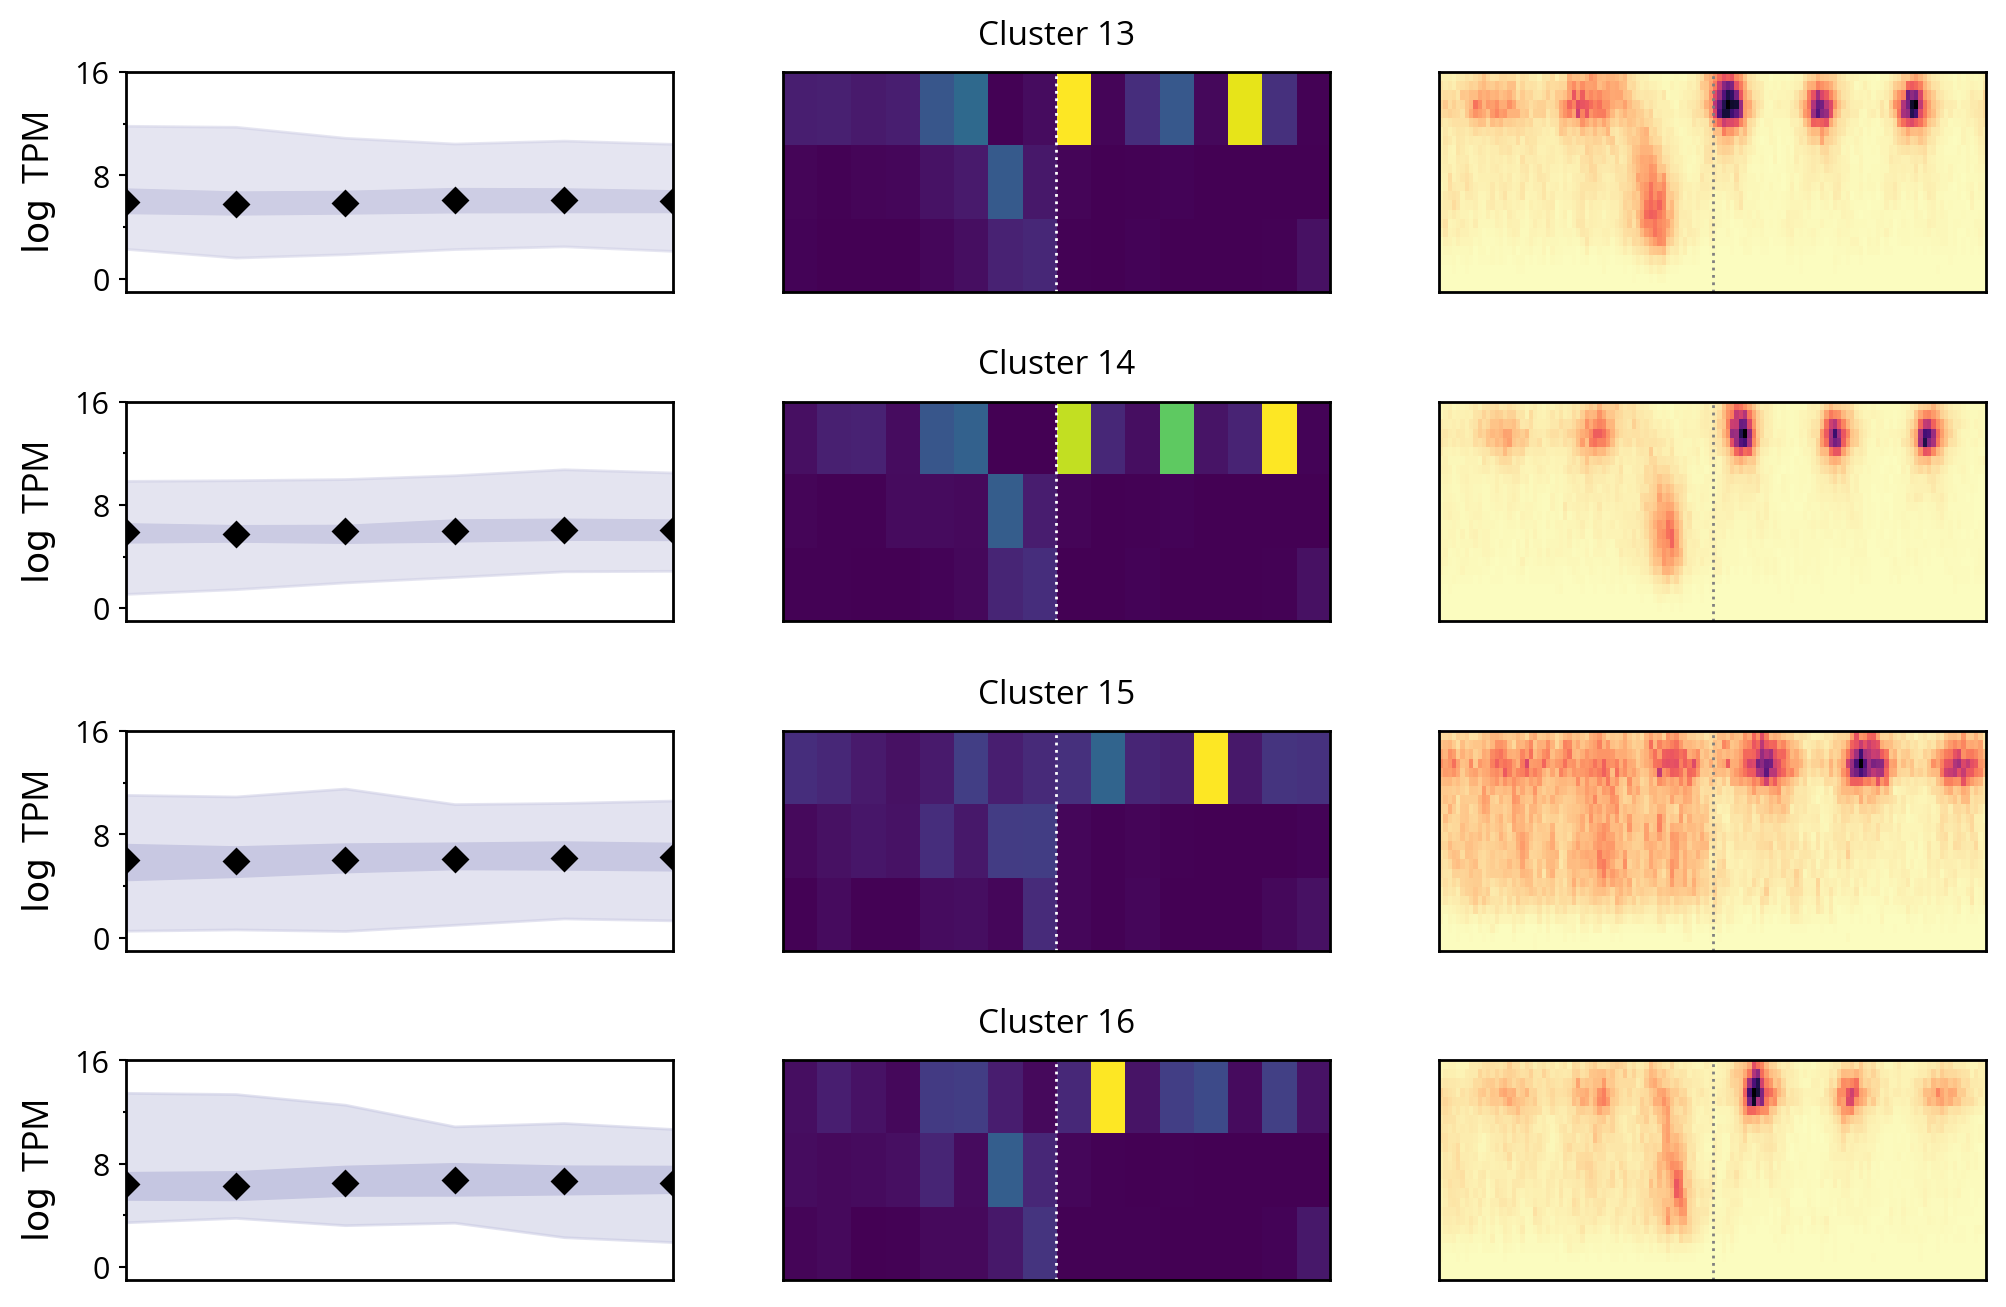

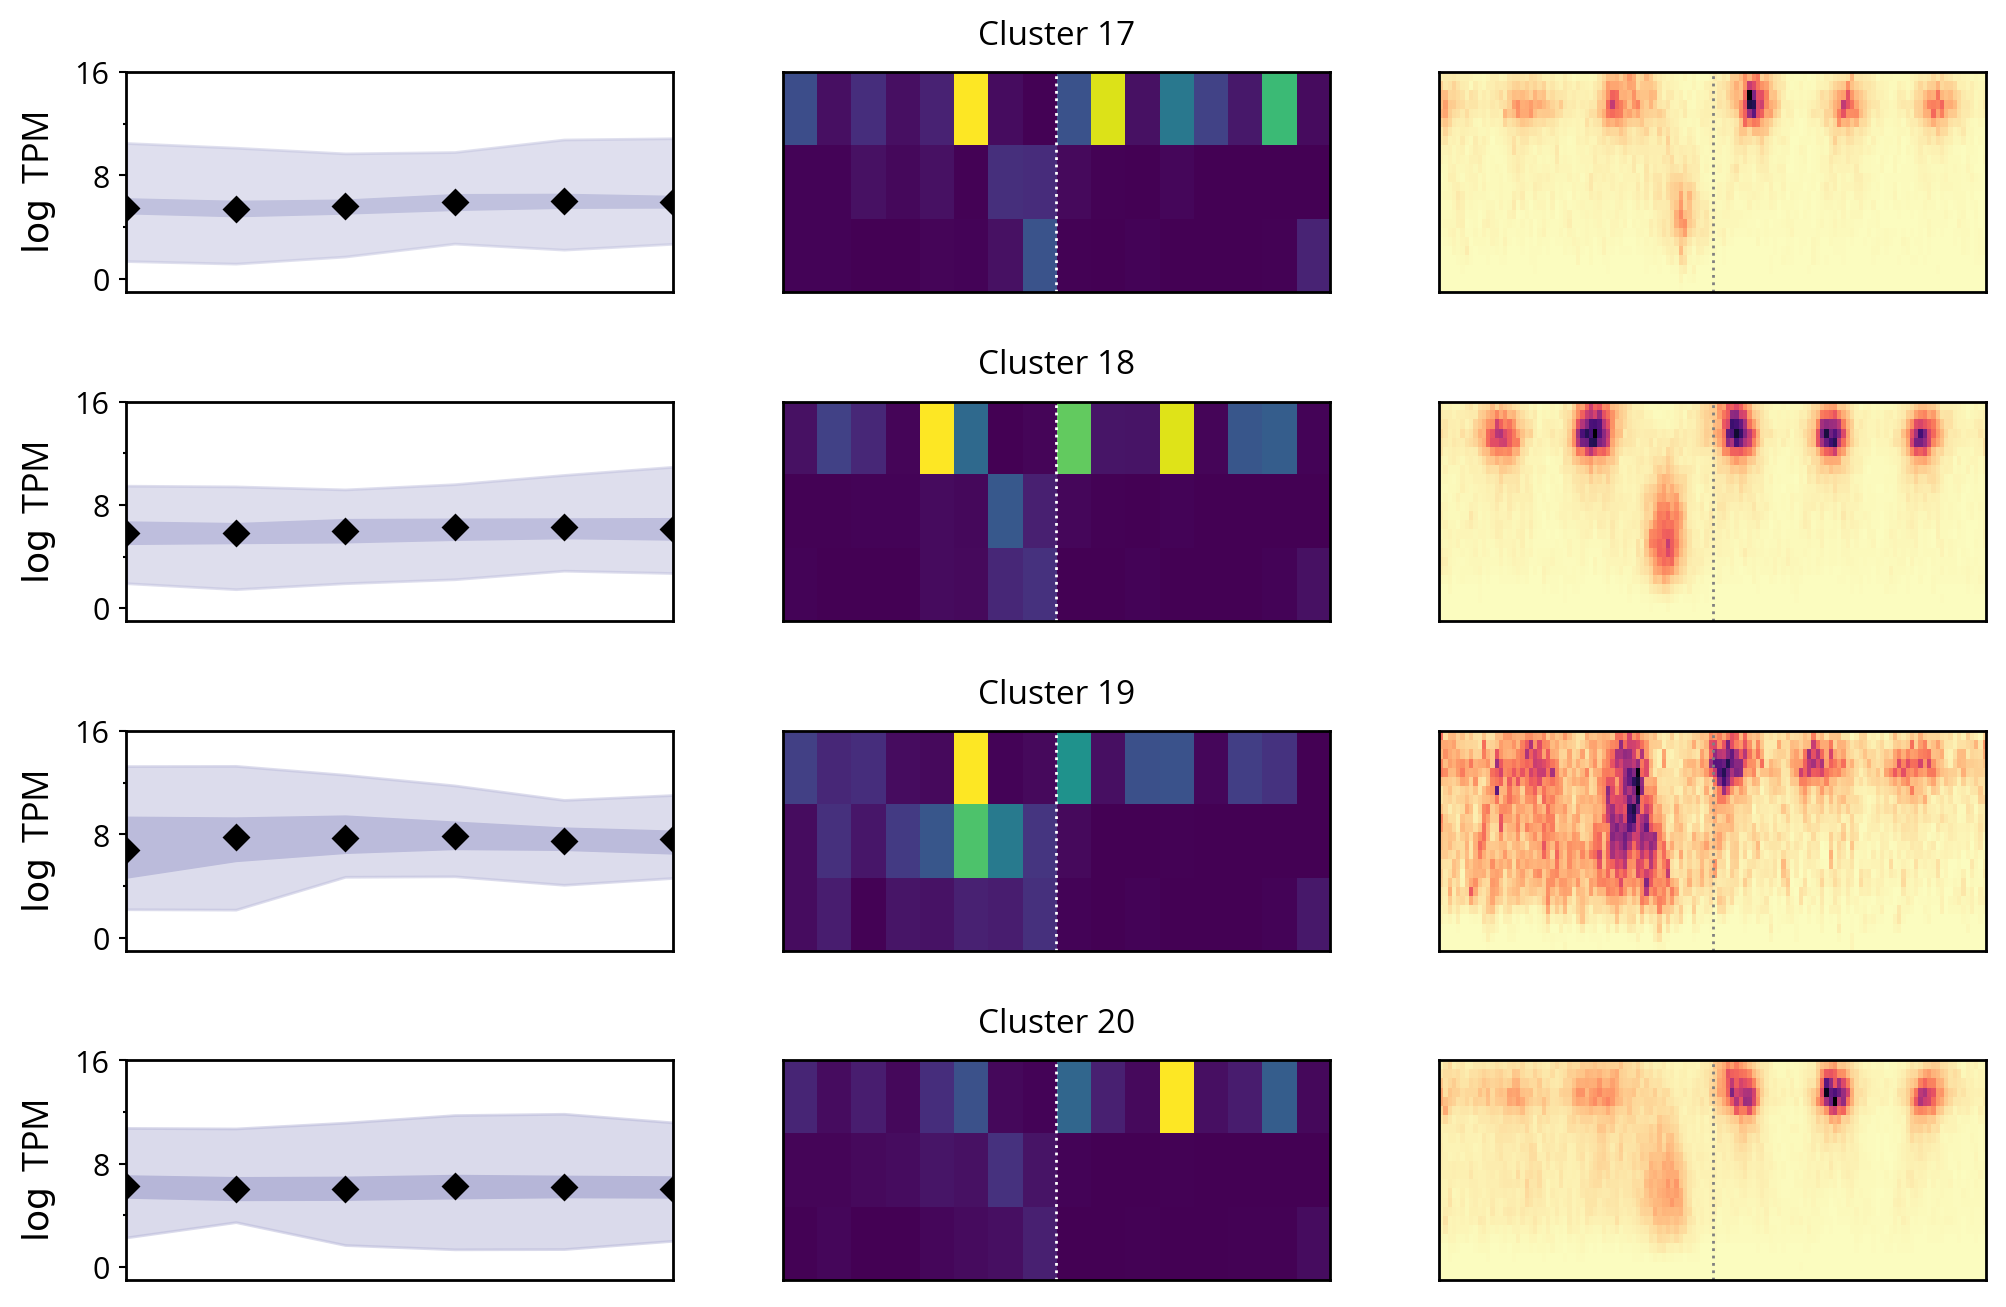

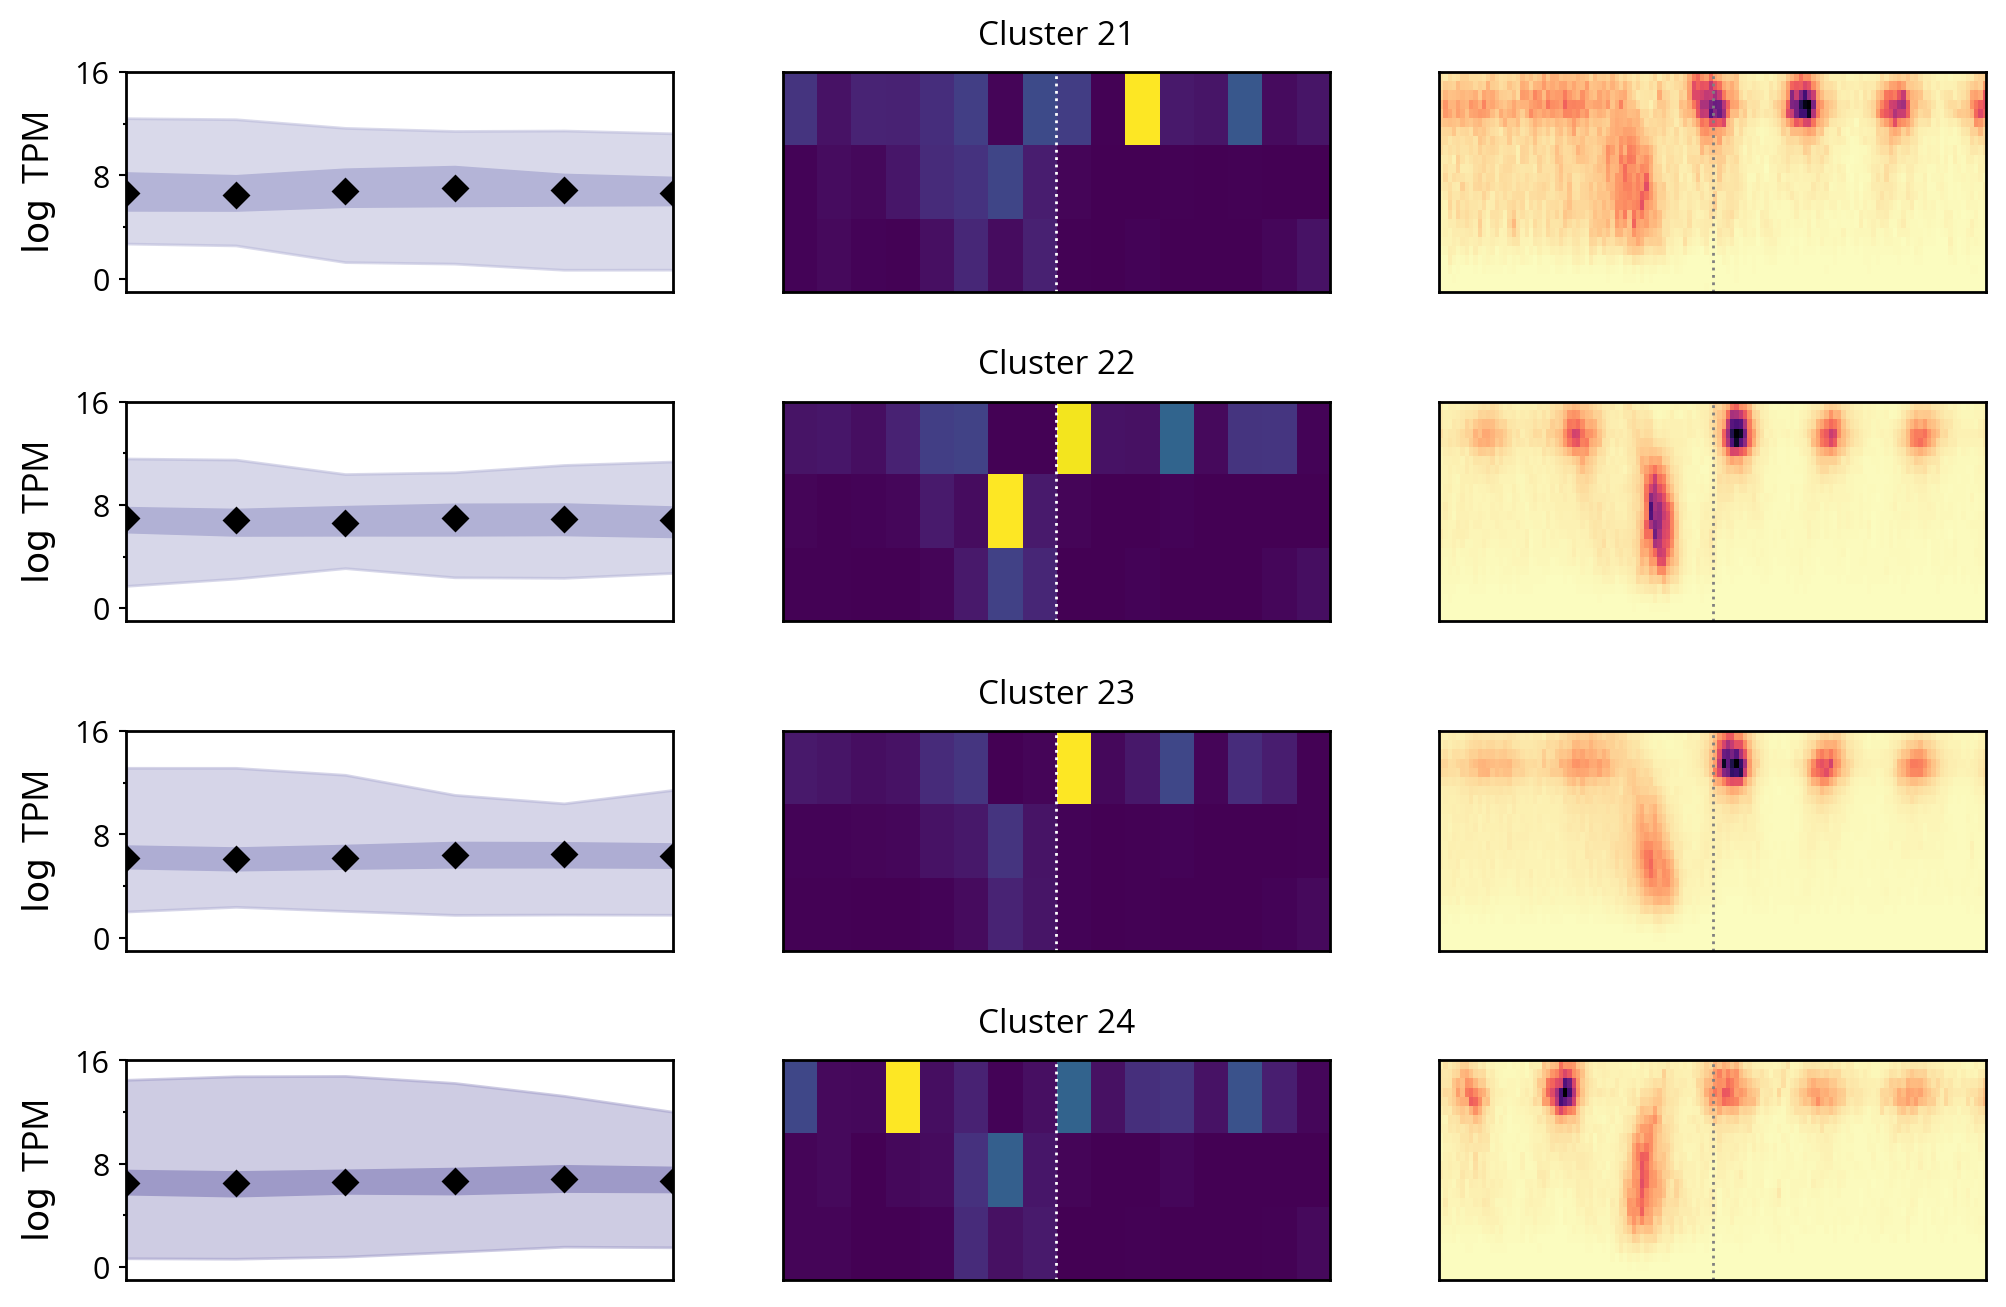

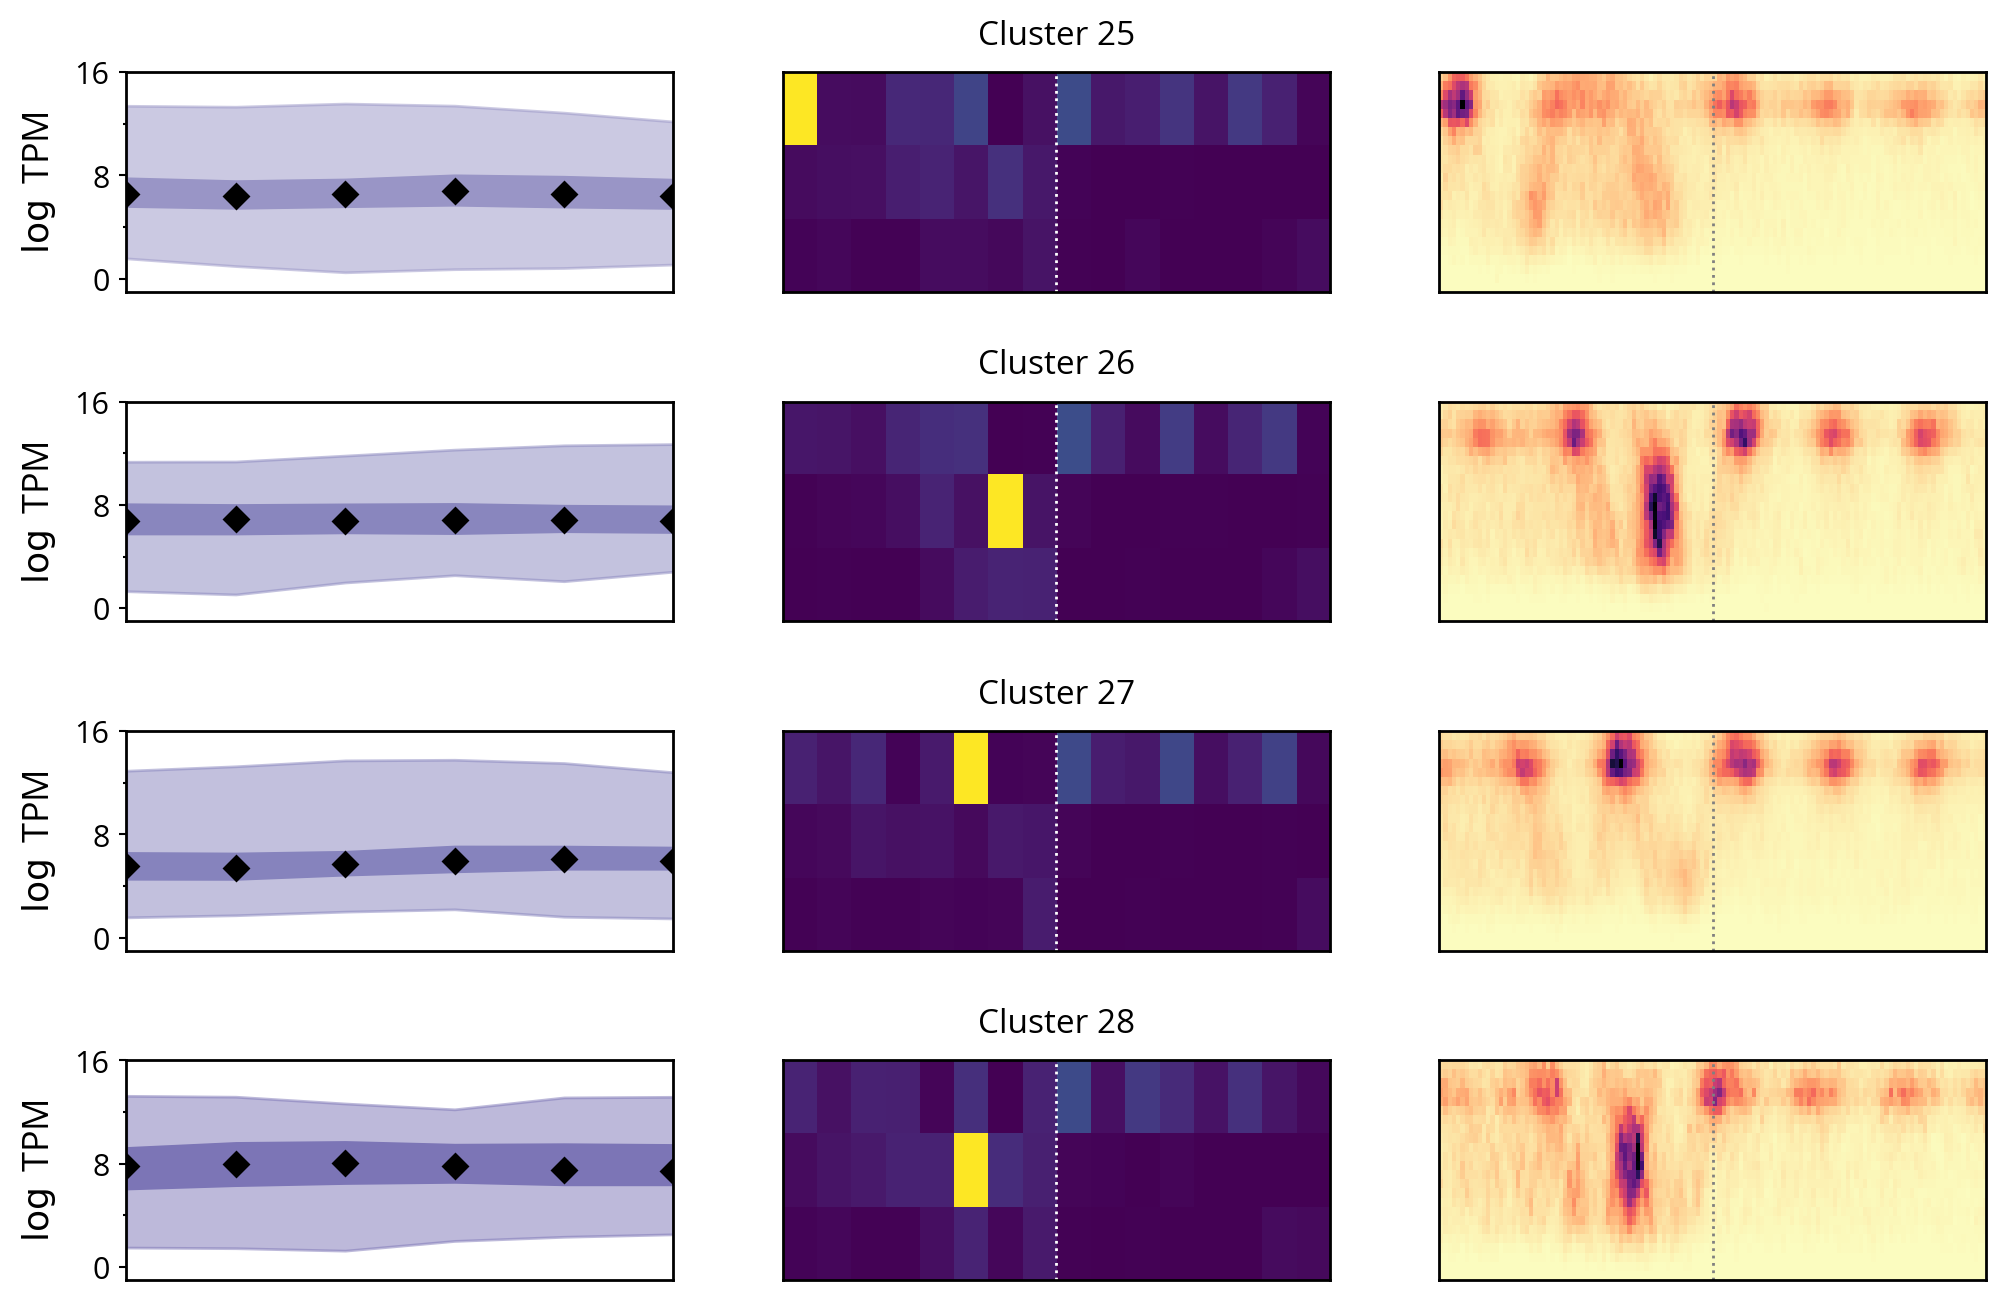

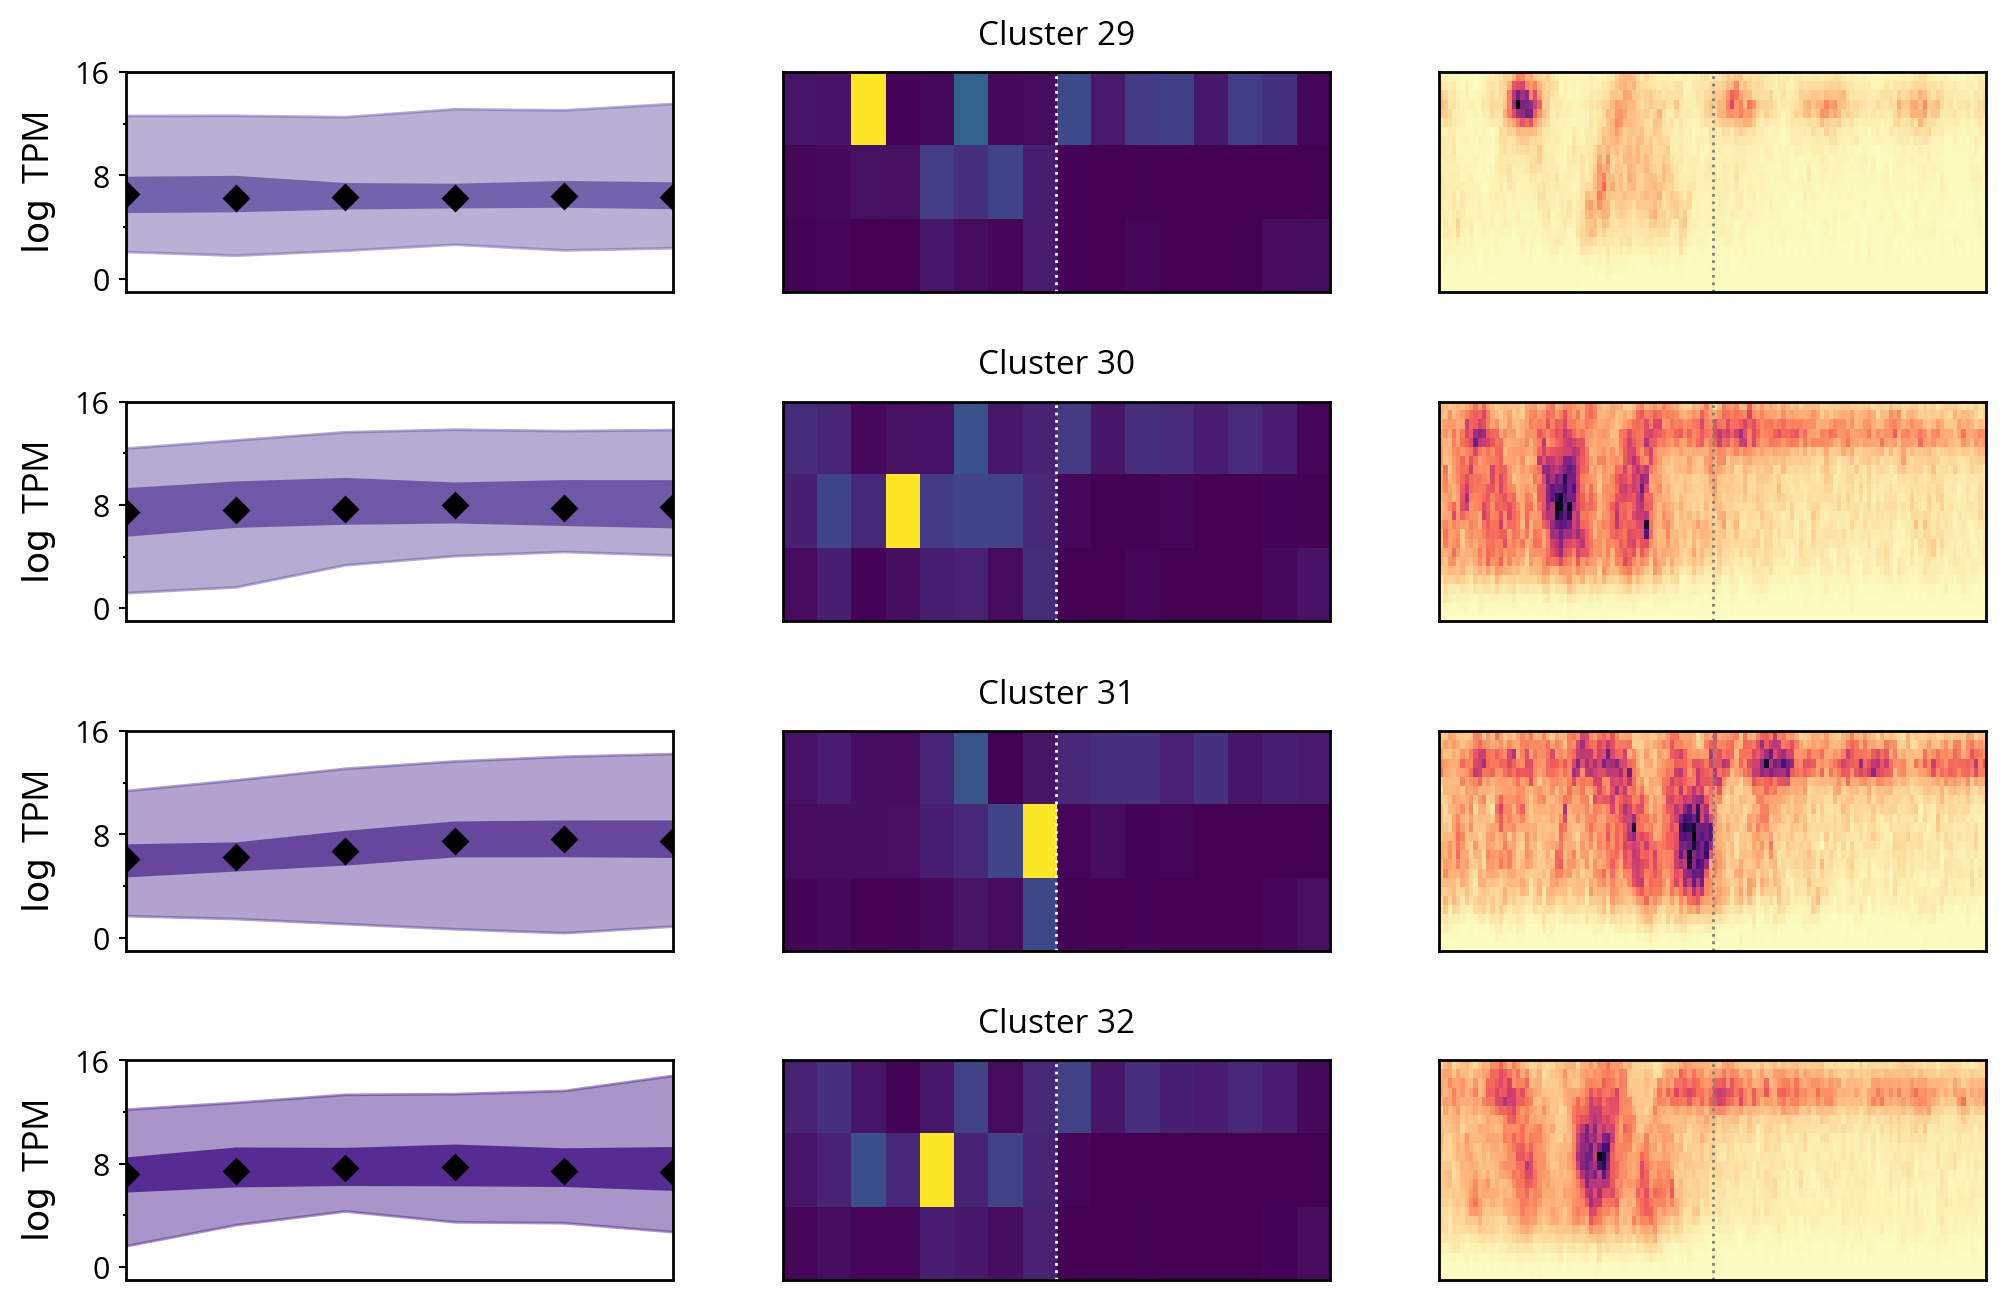

In [393]:
from src.plot_utils import apply_global_settings
from src.utils import mkdir_safe

apply_global_settings(titlepad=10)

plt_idx = 0
c_max = 4

mkdir_safe(f'{trainer.out_dir}/clusters')
subplot_num = 0

for cluster in cl_df.index.values:
    
    cur_plt_idx = plt_idx % c_max

    if cur_plt_idx == 0:
        fig = plt.figure(figsize=(12, 8))
        fig.tight_layout() 
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
        subplot_num += 1

    current_idx = np.arange(len(atts_120))[cd_120_cluster_labels == cluster]
    
    plt.subplot(c_max, 3, (cur_plt_idx*3)+1)
    plot_tpm_cluster_idx(trainer, orfs_120, current_idx)
    plt.xticks([])
        
    plt.subplot(c_max, 3, (cur_plt_idx*3)+2)
    plt.imshow(atts_120[current_idx].mean(axis=0), origin='lower', extent=[-8, 8, 0, 3], aspect='auto')
    plt.axvline(0, color='white', lw=1, linestyle='dotted')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Cluster {plt_idx+1}")
    
    plt.subplot(c_max, 3, (cur_plt_idx*3)+3)
    imgs_120 = vit_data.all_imgs[idx_120]
    imgs_120[current_idx].mean(axis=0).shape
    plt.imshow(imgs_120[current_idx].mean(axis=0)[0], origin='lower', extent=[-8, 8, 0, 3], 
               cmap='magma_r', aspect='auto')
    plt.axvline(0, color='gray', lw=1, linestyle='dotted')
    plt.xticks([])
    plt.yticks([])
    
    if cur_plt_idx == (c_max-1):
        plt.savefig(f'{trainer.out_dir}/clusters/{c}_{subplot_num}.png', dpi=200)

    plt_idx += 1
    

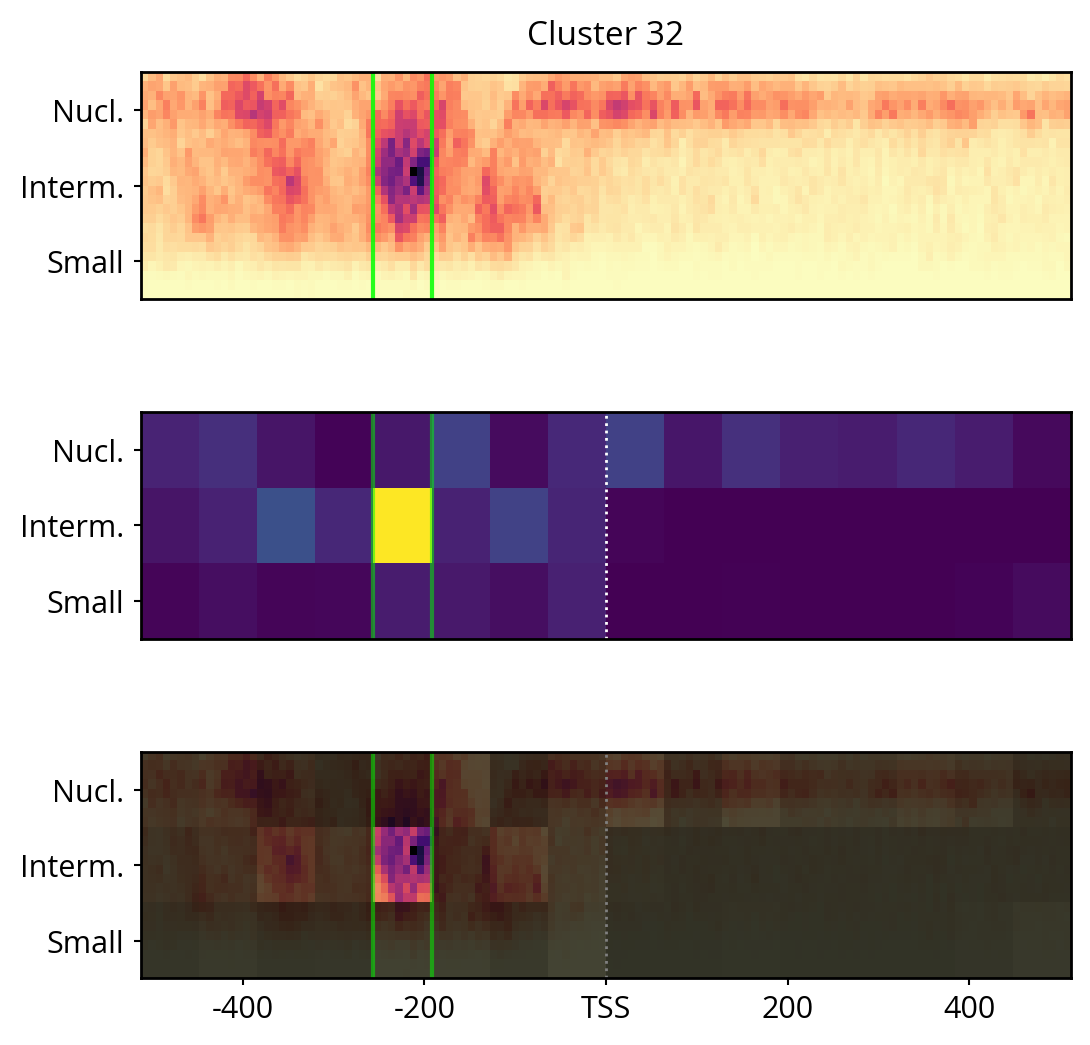

In [394]:
from matplotlib.colors import LinearSegmentedColormap

fig = plt.figure(figsize=(6, 6))
fig.tight_layout() 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
subplot_num += 1
extent = [-512, 512, 0, 3]

yticks = np.arange(0, 3)+0.5
ytick_labs = ['Small', 'Interm.', 'Nucl.']

current_idx = np.arange(len(atts_120))[cd_120_cluster_labels == cluster]
cur_att = atts_120[current_idx].mean(axis=0)
cur_img = imgs_120[current_idx].mean(axis=0)[0]

plt.subplot(3, 1, 1)
plt.title(f"Cluster {plt_idx}")
plt.imshow(cur_img, origin='lower', extent=extent,
       cmap='magma_r', aspect='auto')
plt.xticks([])
plt.yticks(yticks, ytick_labs)
plt.axvline(-256, c='#0f0', alpha=0.85)
plt.axvline(-192, c='#0f0', alpha=0.85)

plt.subplot(3, 1, 2)
plt.imshow(cur_att, origin='lower', extent=extent, aspect='auto')
plt.axvline(0, color='white', lw=1, linestyle='dotted')
plt.xticks([])
plt.yticks(yticks, ytick_labs)
plt.axvline(-256, c='#0f0', alpha=0.5)
plt.axvline(-192, c='#0f0', alpha=0.5)


cm_data = [[0, 0, 0, 1], [0, 0, 0, 0]]
color_map = LinearSegmentedColormap.from_list('overlay', cm_data)
    
plt.subplot(3, 1, 3)
plt.imshow(cur_img, origin='lower', extent=extent,
       cmap='magma_r', aspect='auto')
plt.imshow(cur_att, extent=extent, origin='lower', cmap=color_map, vmin=0, vmax=1, 
            aspect='auto', alpha=0.8)

plt.axvline(0, color='gray', lw=1, linestyle='dotted')
xticks = np.arange(-600, 600, 200)
xticklabs = [str(x) if x != 0 else 'TSS' for x in xticks]
plt.xticks(xticks, xticklabs)
plt.xlim(-512, 512)
plt.yticks(yticks, ytick_labs)

plt.axvline(-256, c='#0f0', alpha=0.5)
plt.axvline(-192, c='#0f0', alpha=0.5)

